# Importación de Librerías

In [1]:
import sys
import os
sys.path.append(".")
import pandas as pd
import numpy as np
import pandasql as ps
from datetime import timedelta
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
def thousands_formatter_func(x, pos):
    return f'{int(x / 1e3)}K'
thousand_formatter = FuncFormatter(thousands_formatter_func)
def percentage_formatter_func(x, pos):
    return f'{int(x * 100)}%'
percentage_formatter = FuncFormatter(percentage_formatter_func)

# Lectura de archivos

## Lectura Dataset de Bombas

In [3]:
df_bombs = pd.read_csv('data/csv/Dataset_Bombes_2020-23.csv', delimiter=';', encoding='latin-1',  dtype={'T_Diff [s]': 'object'})
df_bombs['dhIni'] = pd.to_datetime(df_bombs['dhIni'], format='%Y-%m-%d %H:%M:%S.%f')
df_bombs['dhFin'] = pd.to_datetime(df_bombs['dhFin'], format='%Y-%m-%d %H:%M:%S.%f')
df_bombs['T_Diff [s]'] = df_bombs['T_Diff [s]'].fillna('0').str.replace('.', '').replace(',', '.').astype(int)
df_bombs['TiempoTeorico [min]'] = df_bombs['TiempoTeorico [min]'].fillna('0').str.replace('.', '').str.replace(',', '.').astype(float)
df_bombs['Orden'] = df_bombs['Orden'].fillna(0).astype(int)
df_bombs['OperIds'] = df_bombs['OperIds'].fillna('')

df_bombs.rename(columns={
    'Orden': 'order',
    'CodMaterial': 'bomb_type',
    'DescMaterial': 'bomb_description',
    'maquina_dsc': 'line',
    'QtyPlan': 'plan_qty',
    'QtyBuenas_Total': 'total_good_qty',
    'QtyMalas_Total': 'total_bad_qty',
    'CantidadBuenas': 'good_qty',
    'CantidadMalas': 'bad_qty',
    'dhIni': 'start_date',
    'dhFin': 'end_date',
    'T_Diff [s]': 'theorical_diff',
    'IncidName': 'incidence_name',
    'Observaciones': 'observations',
    'TiempoTeorico [min]': 'theorical_time',
    'OperariosEnMaq': 'operators_qty',
    'OperIds': 'operators_ids'    
}, inplace=True)

print(df_bombs.shape)
df_bombs.head()

/var/folders/th/fw9vgnb57s3c_wc29f04z42h0000gn/T/ipykernel_49560/3051157990.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bombs['T_Diff [s]'] = df_bombs['T_Diff [s]'].fillna('0').str.replace('.', '').replace(',', '.').astype(int)
/var/folders/th/fw9vgnb57s3c_wc29f04z42h0000gn/T/ipykernel_49560/3051157990.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bombs['TiempoTeorico [min]'] = df_bombs['TiempoTeorico [min]'].fillna('0').str.replace('.', '').str.replace(',', '.').astype(float)


(120978, 17)


order   bomb_type               bomb_description     line  plan_qty  \
0  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
1  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
2  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
3  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
4  5165729  01224-0890  B.CENT.20CV 400/690 1450 S/PR  LÍNEA 1       2.0   

   total_good_qty  total_bad_qty  good_qty  bad_qty              start_date  \
0             9.0            0.0       0.0      0.0 2020-01-02 05:53:20.250   
1             9.0            0.0       0.0      0.0 2020-01-02 05:53:50.063   
2             9.0            0.0       2.0      0.0 2020-01-02 05:54:08.010   
3             9.0            0.0       0.0      0.0 2020-01-02 08:49:39.577   
4             2.0            0.0       0.0      0.0 2020-01-02 08:59:48.200   

                 end_date  theorical_diff incidence_name observations  \
0 2020-01-02 05:53:50.063              30     Produccion          NaN   
1 2020-01-02 05:54:08.010              18     Produccion          NaN   
2 2020-01-02 08:49:39.577           10531     Produccion          NaN   
3 2020-01-02 08:59:16.247             577     Produccion          NaN   
4 2020-01-02 09:02:40.420             172     Produccion          NaN   

   theorical_time  operators_qty operators_ids  
0           85.00            1.0          5025  
1           85.00            1.0          5025  
2           85.00            1.0          5025  
3           85.00            1.0          5025  
4           85.58            1.0          5025

## Lectura Dataset Defectuosas Interna

In [4]:
df_defective = pd.read_csv('data/csv/Defectuositat_Interna_2020-23.csv', delimiter=';', encoding='latin-1')[:-3]
df_defective['Jornada'] = pd.to_datetime(df_defective['Jornada'], format='%d-%m-%y')
print(df_defective.shape)
print(df_defective.dtypes)
df_defective.head()


(1853, 15)
Jornada       datetime64[ns]
Maq.                  object
OF                   float64
Descripció            object
Item                  object
Component             object
Qty                  float64
T.I.                  object
Motiu                 object
Decisió               object
Units FR             float64
Qty. Fab.            float64
Q.F./Dia             float64
FR                    object
FR/Dia                object
dtype: object


Jornada        Maq.         OF            Descripció        Item  \
0 2023-01-04     LINEA 3  5373418.0  BOMBA VERDON ES 075M       73678   
1 2023-01-04     LINEA 4  5372007.0          B.A.SENA 33M       25461   
2 2023-01-04     LINEA 4  5372007.0          B.A.SENA 33M       25461   
3 2023-01-03  LÍNEA KIVU  5371822.0  BOMBA KIVU 4HP 400/6  63043-0890   
4 2023-01-02     LÍNEA 2  5371351.0   BOMBA V.PLUS SILENT       65562   

     Component  Qty T.I.                   Motiu              Decisió  \
0   73678-0475  NaN    G          DAÑOS O GOLPES             Destruir   
1   25461-0300  NaN    R  ROSCADO EJE MOTOR N/OK             Destruir   
2  25461-9601F  NaN    G   FUGAS CIERRE MECÁNICO  Recuperable In Situ   
3   72A4000075  NaN    G          DAÑOS O GOLPES             Destruir   
4   77C2000064  NaN    G      MONTAJE JUNTA N/OK  Recuperable In Situ   

   Units FR  Qty. Fab.  Q.F./Dia   FR FR/Dia  
0       NaN      408.0       NaN  NaN    NaN  
1       NaN      192.0       NaN  NaN    NaN  
2       NaN      192.0       NaN  NaN    NaN  
3       NaN        6.0       NaN  NaN    NaN  
4       NaN      792.0       NaN  NaN    NaN

## Información Relevante de Bombas

In [5]:
df_exp = df_bombs.operators_ids.str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('operators_ids')

In [6]:
print(f"""Resumen información relevante sobre el Dataset de bombas:
--> Cantidad de Órdenes de fabicación: {df_bombs.order.nunique()}
--> Cantidad de distintos materiales: {df_bombs.bomb_type.nunique()}
--> Cantidad de lineas/máquinas: {df_bombs.line.nunique()}
--> Cantidad máxima registrada de operarios en máquinas: {df_bombs.operators_qty.max()}
--> Cantidad de operarios distintos que trabajan en la planta: {df_exp.operators_ids.nunique()}

--> Fecha más antigua de registros: {df_bombs.start_date.min()}
--> Fecha más nueva de registros: {df_bombs.end_date.max()}    
""")

Resumen información relevante sobre el Dataset de bombas:
--> Cantidad de Órdenes de fabicación: 5555
--> Cantidad de distintos materiales: 724
--> Cantidad de lineas/máquinas: 10
--> Cantidad máxima registrada de operarios en máquinas: 8.0
--> Cantidad de operarios distintos que trabajan en la planta: 117

--> Fecha más antigua de registros: 2020-01-02 05:49:27.273000
--> Fecha más nueva de registros: 2023-02-13 13:30:36.823000    



### Revisión de casos Diff cero

In [7]:
print(df_bombs[df_bombs.theorical_diff < 0].order.unique())
df_bombs[df_bombs.theorical_diff < 0].order.nunique()

[5263472 5273225 5275960 5253657 5268390 5288629 5261566 5267248 5257965
 5256172 5265480 5265141 5255357 5274189 5273874 5274188 5281115 5281112
 5287266 5271238 5272862 5280384 5279750 5276295 5278425 5266757 5278420
 5279741 5281111 5282399 5278101 5286927 5286654 5292715 5277735 5282392
 5282397 5292409 5292408 5289828 5278864 5280048 5295482 5280388 5295485
 5293107 5292717 5295268 5279198 5297069 5300944 5288215 5297071 5299075
 5293349 5298783 5302107 5298199 5295267 5305865 5288214 5293108 5304372
 5298785 5293109 5298791 5305922 5298787 5305904 5307933 5310395 5303175
 5306488 5288639 5297584 5295741 5262185 5263883 5281110 5327074 5265473
 5276292 5288137 5282079 5296682 5259363 5313918 5313939 5327336 5327338
 5333201]


91

In [8]:
df_bombs[df_bombs.order == 5263472]

order   bomb_type                bomb_description     line  plan_qty  \
3234  5263472  01205-0930  B.CENT.12,5CV 400/690 3000 R.B  LÍNEA 1       2.0   
3235  5263472  01205-0930  B.CENT.12,5CV 400/690 3000 R.B  LÍNEA 1       2.0   
3236  5263472  01205-0930  B.CENT.12,5CV 400/690 3000 R.B  LÍNEA 1       2.0   
3237  5263472  01205-0930  B.CENT.12,5CV 400/690 3000 R.B  LÍNEA 1       2.0   
3238  5263472  01205-0930  B.CENT.12,5CV 400/690 3000 R.B  LÍNEA 1       2.0   

      total_good_qty  total_bad_qty  good_qty  bad_qty  \
3234             2.0            0.0       0.0      0.0   
3235             2.0            0.0       0.0      0.0   
3236             2.0            0.0       0.0      0.0   
3237             2.0            0.0       2.0      0.0   
3238             2.0            0.0       0.0      0.0   

                  start_date                end_date  theorical_diff  \
3234 2021-07-01 09:34:25.470 2021-07-01 09:35:51.207              86   
3235 2021-07-01 09:35:51.207 2021-07-01 09:36:15.723              24   
3236 2021-07-01 09:36:15.723 2021-07-01 09:14:58.547           -1277   
3237 2021-07-01 10:36:50.950 2021-07-01 12:32:11.630            6921   
3238 2021-07-01 12:32:11.630 2021-07-01 12:32:22.540              11   

     incidence_name observations  theorical_time  operators_qty operators_ids  
3234     Produccion          NaN            80.0            1.0          5004  
3235     Produccion          NaN            80.0            1.0          5004  
3236     Produccion          NaN            80.0            1.0          5004  
3237     Produccion          NaN            80.0            1.0          5004  
3238     Produccion          NaN            80.0            1.0          5004

In [9]:
df_bombs[(df_bombs.theorical_diff < 0) & (df_bombs.good_qty != 0)].order.nunique()

82

Conclusión: eliminar la OF que contengan registros?

## Generación cantidad teórica calculada por registro

Creamos nuestra propias columnas calculadas: <br>
* Cantidad de trabajadores por registro según los ids asociados.
* Diferencia en segundos de tiempo de inicio con tiempo de fin de registro
* Diferencia en minutos de tiempo de inicio con tiempo de fin de registro
* Total de *minutos-hombre* trabajados en el registro ${duración de registo en minutos \times cantidad de operarios en el registro}$

In [10]:
df_bombs['operators_qty_calculated'] = df_bombs.operators_ids.apply(lambda x: len(list(filter(lambda s: s != "", x.split(',')))))
df_bombs['time_diff_seconds_calculated'] = (df_bombs['end_date'] - df_bombs['start_date']) / pd.Timedelta(seconds=1)
df_bombs['time_diff_minutes_calculated'] = (df_bombs['end_date'] - df_bombs['start_date']) / pd.Timedelta(minutes=1)

df_bombs['total_operators_minutes'] = df_bombs['operators_qty_calculated'] * df_bombs['time_diff_minutes_calculated']

df_bombs

order    bomb_type               bomb_description         line  \
0       5160396         1210      B.CENT.4CV 400/690V 1450R      LÍNEA 1   
1       5160396         1210      B.CENT.4CV 400/690V 1450R      LÍNEA 1   
2       5160396         1210      B.CENT.4CV 400/690V 1450R      LÍNEA 1   
3       5160396         1210      B.CENT.4CV 400/690V 1450R      LÍNEA 1   
4       5165729   01224-0890  B.CENT.20CV 400/690 1450 S/PR      LÍNEA 1   
...         ...          ...                            ...          ...   
120973  5379566  SE2N050M-HS   B.NEWSE R.I.0,5 CV II R.5425  LINEA 8 IML   
120974  5379566  SE2N050M-HS   B.NEWSE R.I.0,5 CV II R.5425  LINEA 8 IML   
120975  5379566  SE2N050M-HS   B.NEWSE R.I.0,5 CV II R.5425  LINEA 8 IML   
120976  5379566  SE2N050M-HS   B.NEWSE R.I.0,5 CV II R.5425  LINEA 8 IML   
120977  5379566  SE2N050M-HS   B.NEWSE R.I.0,5 CV II R.5425  LINEA 8 IML   

        plan_qty  total_good_qty  total_bad_qty  good_qty  bad_qty  \
0            9.0             9.0            0.0       0.0      0.0   
1            9.0             9.0            0.0       0.0      0.0   
2            9.0             9.0            0.0       2.0      0.0   
3            9.0             9.0            0.0       0.0      0.0   
4            2.0             2.0            0.0       0.0      0.0   
...          ...             ...            ...       ...      ...   
120973      30.0            30.0            0.0       1.0      0.0   
120974      30.0            30.0            0.0       1.0      0.0   
120975      30.0            30.0            0.0       1.0      0.0   
120976      30.0            30.0            0.0       0.0      0.0   
120977      30.0            30.0            0.0       0.0      0.0   

                    start_date                end_date  theorical_diff  \
0      2020-01-02 05:53:20.250 2020-01-02 05:53:50.063              30   
1      2020-01-02 05:53:50.063 2020-01-02 05:54:08.010              18   
2      2020-01-02 05:54:08.010 2020-01-02 08:49:39.577           10531   
3      2020-01-02 08:49:39.577 2020-01-02 08:59:16.247             577   
4      2020-01-02 08:59:48.200 2020-01-02 09:02:40.420             172   
...                        ...                     ...             ...   
120973 2023-02-13 07:30:12.033 2023-02-13 07:33:12.597             180   
120974 2023-02-13 07:33:12.597 2023-02-13 07:34:44.927              92   
120975 2023-02-13 07:34:44.927 2023-02-13 07:36:24.893             100   
120976 2023-02-13 07:36:24.893 2023-02-13 07:38:02.443              98   
120977 2023-02-13 07:38:02.443 2023-02-13 07:38:14.120              12   

       incidence_name observations  theorical_time  operators_qty  \
0          Produccion          NaN           85.00            1.0   
1          Produccion          NaN           85.00            1.0   
2          Produccion          NaN           85.00            1.0   
3          Produccion          NaN           85.00            1.0   
4          Produccion          NaN           85.58            1.0   
...               ...          ...             ...            ...   
120973     Produccion          NaN           11.00            4.0   
120974     Produccion          NaN           11.00            4.0   
120975     Produccion          NaN           11.00            4.0   
120976     Produccion          NaN           11.00            4.0   
120977     Produccion          NaN           11.00            4.0   

               operators_ids  operators_qty_calculated  \
0                       5025                         1   
1                       5025                         1   
2                       5025                         1   
3                       5025                         1   
4                       5025                         1   
...                      ...                       ...   
120973  8250,9109,9279,9351,                         4   
120974  8250,9109,9279,9351,                         4   
120975  8250,910

## Agrupación por Orden de fabricación

In [11]:
df_bombs_grouped = df_bombs.groupby(
        ['order', 'bomb_type', 'line']
    ).agg(
        plan_qty=('plan_qty', 'max'),
        total_good_qty=('total_good_qty', 'max'),
        total_bad_qty=('total_bad_qty', 'max'),
        good_qty=('good_qty', 'sum'),
        bad_qty=('bad_qty', 'sum'),
        start_date=('start_date', 'min'),
        end_date=('end_date', 'max'),
        theorical_diff=('theorical_diff', 'sum'),
        theorical_time=('theorical_time', 'max'),
        time_diff_seconds_calculated=('time_diff_seconds_calculated', 'sum'),
        time_diff_minutes_calculated=('time_diff_minutes_calculated', 'sum'),
        total_operators_minutes=('total_operators_minutes', 'sum'),
        operators_distinct_ids=('operators_ids', lambda x: list(set([i for s in x if isinstance(s, str) for i in s.split(',') if i]))),
        registers_qty=('start_date', 'count'),
        
    ).reset_index()
df_bombs_grouped['operators_distinct_qty'] = df_bombs_grouped.operators_distinct_ids.apply(lambda x: len(x))
df_bombs_grouped['theorical_qty'] = df_bombs_grouped.total_operators_minutes/df_bombs_grouped.theorical_time
df_bombs_grouped['theorical_qty_round'] = df_bombs_grouped.theorical_qty.round(0)
df_bombs_grouped['performance'] = df_bombs_grouped.good_qty/df_bombs_grouped.theorical_qty
df_bombs_grouped['performance_round'] = df_bombs_grouped.good_qty/df_bombs_grouped.theorical_qty_round
df_bombs_grouped

order    bomb_type         line  plan_qty  total_good_qty  \
0      274185      HPS050M      LÍNEA 2       1.0             0.0   
1     5029646        25461      LINEA 4       1.0            17.0   
2     5070828        11509      LINEA 6      12.0             0.0   
3     5155152   30893-1194      LINEA 4       8.0             8.0   
4     5157110   01226-0890      LÍNEA 1       2.0             2.0   
...       ...          ...          ...       ...             ...   
5552  5382620  M00874TP230  LINEA 8 IML       1.0             1.0   
5553  5382621  M00875TP230  LINEA 8 IML       1.0             1.0   
5554  5382622  M00876TP230  LINEA 8 IML       1.0             1.0   
5555  5382623  M00877TP230  LINEA 8 IML       1.0             1.0   
5556  5382624  M00883TP230  LINEA 8 IML       1.0             1.0   

      total_bad_qty  good_qty  bad_qty              start_date  \
0               0.0       0.0      0.0 2020-02-28 07:47:47.760   
1               0.0       0.0      0.0 2020-05-26 10:42:49.543   
2               0.0       0.0      0.0 2020-04-17 05:47:54.977   
3               0.0       8.0      0.0 2020-05-13 09:44:25.233   
4               0.0       2.0      0.0 2020-01-27 12:04:52.480   
...             ...       ...      ...                     ...   
5552            0.0       1.0      0.0 2023-02-02 16:48:58.883   
5553            0.0       1.0      0.0 2023-02-02 16:47:14.330   
5554            0.0       1.0      0.0 2023-02-02 16:49:43.490   
5555            0.0       1.0      0.0 2023-02-02 16:51:05.457   
5556            0.0       1.0      0.0 2023-02-02 16:51:46.697   

                    end_date  theorical_diff  theorical_time  \
0    2021-02-18 08:44:11.897           13189           13.35   
1    2021-04-07 05:41:01.177             120            8.80   
2    2022-08-10 06:10:35.247           32671           17.40   
3    2020-05-13 10:07:36.230            1391            8.21   
4    2020-01-28 07:26:01.683           12623           85.58   
...                      ...             ...             ...   
5552 2023-02-02 16:49:22.223              24            8.41   
5553 2023-02-02 16:48:20.677              66            8.41   
5554 2023-02-02 16:50:07.023              24            8.41   
5555 2023-02-02 16:51:35.050              30            8.41   
5556 2023-02-02 16:52:43.103              57            8.41   

      time_diff_seconds_calculated  time_diff_minutes_calculated  \
0                        13189.211                    219.820183   
1                          118.318                      1.971967   
2                        32671.480                    544.524667   
3                         1390.997                     23.183283   
4                        12622.856                    210.380933   
...                            ...                           ...   
5552                        23.340                      0.389000   
5553                        66.347                      1.105783   
5554                        23.533                      0.392217   
5555                        29.593                      0.493217   
5556                        56.406                      0.940100   

      total_operators_minutes  \
0                  590.426267   
1                    3.112383   
2                  594.821567   
3                   46.366567   
4                  210.380933   
...                       ...   
5552                 0.389000   
5553                 1.105783   
5554                 0.392217   
5555                 0.493217   
5556                 0.940100   

                                 operators_distinct_ids  registers_qty  \
0     [287, 8615, 9105, 8250, 9104, 8860, 8177, 8164...             10   
1                        [5020, 8822, 8860, 9120, 8866]              4   
2                                    [5033, 9436, 9142]              8   
3                                          [5015, 5036]              2   
4                                

In [12]:
df_of = df_bombs_grouped.copy()

Más información relevante:

In [13]:
print(f'''
    | Cantidad total órdenes de fabricación: {df_of.shape[0]}
    | Cantidad de órdenes de fabricación con diferencia en cantidad buenas reportadas versus la suma de sus registros: {df_of[df_of.total_good_qty != df_of.good_qty].shape[0]}
        -> Casos CantidadBuenas > QtyBuenas_total : {df_of[df_of.total_good_qty < df_of.good_qty].shape[0]}  
        -> Casos CantidadBuenas < QtyBuenas_total : {df_of[df_of.total_good_qty > df_of.good_qty].shape[0]} 
    
    | Cantidad máxima de operadores trabajando en una misma OF: {df_of.operators_distinct_qty.max()}
    
    | Cantidad de órdenes con Qtyplan distintos a cantidad teórica calculada: {df_of[df_of.plan_qty != df_of.theorical_qty_round].shape[0]}
    
    | Duración máxima (minutos) de un registro: {df_bombs.time_diff_minutes_calculated.max()}
''')


    | Cantidad total órdenes de fabricación: 5557
    | Cantidad de órdenes de fabricación con diferencia en cantidad buenas reportadas versus la suma de sus registros: 332
        -> Casos CantidadBuenas > QtyBuenas_total : 45  
        -> Casos CantidadBuenas < QtyBuenas_total : 287 
    
    | Cantidad máxima de operadores trabajando en una misma OF: 12
    
    | Cantidad de órdenes con Qtyplan distintos a cantidad teórica calculada: 5076
    
    | Duración máxima (minutos) de un registro: 937.5479



Revisión de cantidad de OF operadas por línea:

In [14]:
df_of.groupby('line').size().reset_index(name='count').sort_values(by='count', ascending=False)

line  count
6        LÍNEA 2   1433
4    LINEA 8 IML   1003
0        LINEA 3    689
1        LINEA 4    675
2        LINEA 6    585
5        LÍNEA 1    537
7     LÍNEA KIVU    302
3        LINEA 7    181
8  PREFILTRO L-1     88
9  PREFILTRO L-6     64

Revisión de cantidad de tipos de bombas operadas por máquina:

In [15]:
df_bombs.bomb_type.nunique()

724

In [16]:
df_of.groupby(['line', 'bomb_type']).size().reset_index().groupby(['line']).size().reset_index(name='count').sort_values(by='count', ascending=False)

line  count
4    LINEA 8 IML    335
0        LINEA 3    131
6        LÍNEA 2     82
1        LINEA 4     59
5        LÍNEA 1     55
2        LINEA 6     42
7     LÍNEA KIVU     32
3        LINEA 7     24
8  PREFILTRO L-1     10
9  PREFILTRO L-6      4

Revisión de líneas por bomba:

In [17]:
df_grouped = df_of.groupby(['line', 'bomb_type']).size().reset_index().groupby(['bomb_type']).size().reset_index(name='lines_count').sort_values(by='lines_count', ascending=False)
print(df_grouped[df_grouped.lines_count >= 2].shape[0])
df_grouped[df_grouped.lines_count >= 2]

49


bomb_type  lines_count
505         PT001            3
247        65569H            2
235         65566            2
510  SA033MIML000            2
239        65566H            2
240       65566ME            2
241         65567            2
243        65567H            2
244       65567ME            2
245         65569            2
286         72551            2
230         65565            2
249         65570            2
252        65570H            2
284         72549            2
285         72550            2
192         65557            2
287         72552            2
288         72553            2
311          8003            2
233        65565H            2
229       65564ME            2
427   M00883TP230            2
527  SA075MIML000            2
195    65557-1090            2
196        65557H            2
539  SA100MIML000            2
198         65558            2
200        65558H            2
201         65560            2
203    65560-1090            2
204        65560H            2
208         65561            2
228        65564H            2
553  SA125MIML000            2
210        65561H            2
212         65562            2
215        65562H            2
220         65563            2
518  SA050MIML000            2
223        65563H            2
225         65564            2
67           1212            2
193    65557-0810            2
412   M00875TP230            2
415   M00876TP230            2
419   M00877TP230            2
390       HPS050M            2
407   M00874TP230            2

Revisión de tipos de bomba por orden de fabricación

In [18]:
df_grouped = df_of.groupby(['order', 'bomb_type']).size().reset_index().groupby(['order']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_grouped[df_grouped['count'] > 1]

Empty DataFrame
Columns: [order, count]
Index: []

>Nota: órdenes de fabricación hace alusión a un único tipo de bomba

## Limpieza

Eliminación de OF con tiempos negativos (confirmar con cliente)

In [19]:
negative_of = df_bombs[df_bombs.time_diff_minutes_calculated < 0].order.unique()
negative_of.shape[0]


91

In [20]:
df_of = df_of[~df_of.order.isin(negative_of)]
df_bombs = df_bombs[~df_bombs.order.isin(negative_of)]

Revisión de performance de OFs

In [21]:
print(f'''Total OFs: {df_of.shape[0]}
OFs con performance mayor a 100%: {df_of[df_of.performance > 1.0].shape[0]} | {round(df_of[df_of.performance > 1.0].shape[0]/df_of.shape[0]*100)}% del total
OFs con performance mayor a 110%: {df_of[df_of.performance > 1.1].shape[0]} | {round(df_of[df_of.performance > 1.1].shape[0]/df_of.shape[0]*100)}% del total
OFs con performance mayor a 120%: {df_of[df_of.performance > 1.2].shape[0]} | {round(df_of[df_of.performance > 1.2].shape[0]/df_of.shape[0]*100)}% del total
OFs con performance mayor a 150%: {df_of[df_of.performance > 1.5].shape[0]} | {round(df_of[df_of.performance > 1.5].shape[0]/df_of.shape[0]*100)}% del total
''')

Total OFs: 5466
OFs con performance mayor a 100%: 1301 | 24% del total
OFs con performance mayor a 110%: 616 | 11% del total
OFs con performance mayor a 120%: 365 | 7% del total
OFs con performance mayor a 150%: 113 | 2% del total



Eliminación de OF con performance > 120% (confirmar con cliente)

In [22]:
over_performance_of = df_of[df_of.performance > 1.2].order.unique()
over_performance_of.shape[0]

365

In [23]:
df_of = df_of[~df_of.order.isin(over_performance_of)]
df_bombs = df_bombs[~df_bombs.order.isin(over_performance_of)]

Eliminación de órdenes de fabricación en distintas líneas

In [24]:
df_grouped = df_of.groupby(['order', 'line']).size().reset_index().groupby(['order']).size().reset_index(name='count').sort_values(by='count', ascending=False)
multiple_lines_of = df_grouped[df_grouped['count'] > 1].order.unique()
multiple_lines_of.shape[0]

3

In [25]:
df_of = df_of[~df_of.order.isin(multiple_lines_of)]
df_bombs = df_bombs[~df_bombs.order.isin(multiple_lines_of)]

# EDA

## Exploración de Dataset de bombas

### Exploración de valores por columnas

In [26]:
df_bombs.head()

order   bomb_type               bomb_description     line  plan_qty  \
0  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
1  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
2  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
3  5160396        1210      B.CENT.4CV 400/690V 1450R  LÍNEA 1       9.0   
4  5165729  01224-0890  B.CENT.20CV 400/690 1450 S/PR  LÍNEA 1       2.0   

   total_good_qty  total_bad_qty  good_qty  bad_qty              start_date  \
0             9.0            0.0       0.0      0.0 2020-01-02 05:53:20.250   
1             9.0            0.0       0.0      0.0 2020-01-02 05:53:50.063   
2             9.0            0.0       2.0      0.0 2020-01-02 05:54:08.010   
3             9.0            0.0       0.0      0.0 2020-01-02 08:49:39.577   
4             2.0            0.0       0.0      0.0 2020-01-02 08:59:48.200   

                 end_date  theorical_diff incidence_name observations  \
0 2020-01-02 05:53:50.063              30     Produccion          NaN   
1 2020-01-02 05:54:08.010              18     Produccion          NaN   
2 2020-01-02 08:49:39.577           10531     Produccion          NaN   
3 2020-01-02 08:59:16.247             577     Produccion          NaN   
4 2020-01-02 09:02:40.420             172     Produccion          NaN   

   theorical_time  operators_qty operators_ids  operators_qty_calculated  \
0           85.00            1.0          5025                         1   
1           85.00            1.0          5025                         1   
2           85.00            1.0          5025                         1   
3           85.00            1.0          5025                         1   
4           85.58            1.0          5025                         1   

   time_diff_seconds_calculated  time_diff_minutes_calculated  \
0                        29.813                      0.496883   
1                        17.947                      0.299117   
2                     10531.567                    175.526117   
3                       576.670                      9.611167   
4                       172.220                      2.870333   

   total_operators_minutes  
0                 0.496883  
1                 0.299117  
2               175.526117  
3                 9.611167  
4                 2.870333

Revisión de cantidad de valores distintos por columna

In [27]:
results = []
for col in df_bombs.columns:
    results.append([col, len(df_bombs[col].unique())])
pd.DataFrame(results, columns=['Column', 'Distinct Values'])

Column  Distinct Values
0                          order             5096
1                      bomb_type              707
2               bomb_description              727
3                           line               11
4                       plan_qty              252
5                 total_good_qty              312
6                  total_bad_qty                2
7                       good_qty              130
8                        bad_qty                2
9                     start_date           113937
10                      end_date           113938
11                theorical_diff             9674
12                incidence_name                5
13                  observations             1183
14                theorical_time               79
15                 operators_qty               10
16                 operators_ids             2234
17      operators_qty_calculated                9
18  time_diff_seconds_calculated            85991
19  time_diff_minutes_calculated            85991
20       total_operators_minutes            96299

Revisión de tipos de incidencias registrados:

In [28]:
df_bombs.groupby(['incidence_name']).size().reset_index(name='count')

incidence_name   count
0       Falta de Material     285
1             Preparacion      53
2  Problema Mantenimiento    3291
3              Produccion  110541

> Nota: existen registros que tiene incidencia nula. Por lo observado esto se debe a que la observación de ciertos registros abarca más de una celda en el excel. A validar con el cliente qué hacer con estos casos

### Exploración de desempeño general por máquina

In [29]:
df_bombs.groupby(['line']).agg(good_qty=('good_qty', 'sum'), bad_qty=('bad_qty', 'sum'))


good_qty  bad_qty
line                            
LINEA 3         66584.0      0.0
LINEA 4        102836.0      0.0
LINEA 6         22884.0      0.0
LINEA 7         26507.0      0.0
LINEA 8 IML     44992.0      0.0
LÍNEA 1          3710.0      0.0
LÍNEA 2        253932.0      0.0
LÍNEA KIVU       1803.0      0.0
PREFILTRO L-1    1006.0      0.0
PREFILTRO L-6    2977.0      0.0

In [30]:
df_bombs_grouped = df_of.groupby(['line']).agg(theorical_qty=('theorical_qty', 'sum'), theorical_qty_round=('theorical_qty_round', 'sum'), good_qty=('good_qty', 'sum'))
df_bombs_grouped['success_percentage'] = (df_bombs_grouped.good_qty / df_bombs_grouped.theorical_qty *100).round(2) 
df_bombs_grouped['success_percentage_round'] = (df_bombs_grouped.good_qty / df_bombs_grouped.theorical_qty_round *100).round(2)
df_bombs_grouped

theorical_qty  theorical_qty_round  good_qty  \
line                                                          
LINEA 3         83649.057207              83670.0   66584.0   
LINEA 4        111109.774496             111106.0  102836.0   
LINEA 6         24487.871920              24490.0   22884.0   
LINEA 7         37139.869026              37138.0   26507.0   
LINEA 8 IML     66940.927702              66950.0   44992.0   
LÍNEA 1          4116.985046               4109.0    3710.0   
LÍNEA 2        279163.234062             279160.0  253932.0   
LÍNEA KIVU       2230.659755               2238.0    1803.0   
PREFILTRO L-1    1567.027836               1571.0    1006.0   
PREFILTRO L-6    3258.319258               3257.0    2977.0   

               success_percentage  success_percentage_round  
line                                                         
LINEA 3                     79.60                     79.58  
LINEA 4                     92.55                     92.56  
LINEA 6                     93.45                     93.44  
LINEA 7                     71.37                     71.37  
LINEA 8 IML                 67.21                     67.20  
LÍNEA 1                     90.11                     90.29  
LÍNEA 2                     90.96                     90.96  
LÍNEA KIVU                  80.83                     80.56  
PREFILTRO L-1               64.20                     64.04  
PREFILTRO L-6               91.37                     91.40

### Gráficas de interés


#### ¿Cuál es el rango de fechas en el dataset? ¿Existen periodos de inactividad notables en la producción?

In [31]:
def plot_daily_production(df, title):
    data_daily = df.resample('D', on='start_date').sum()
    plt.figure(figsize=(10, 5))
    plt.plot(data_daily.index, data_daily['good_qty'])
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de producción')
    plt.title(title)
    plt.show()
    

>Gráfico 1: Series temporales de producción a lo largo del tiempo (por día)

/var/folders/th/fw9vgnb57s3c_wc29f04z42h0000gn/T/ipykernel_49560/2656114292.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_daily = df.resample('D', on='start_date').sum()


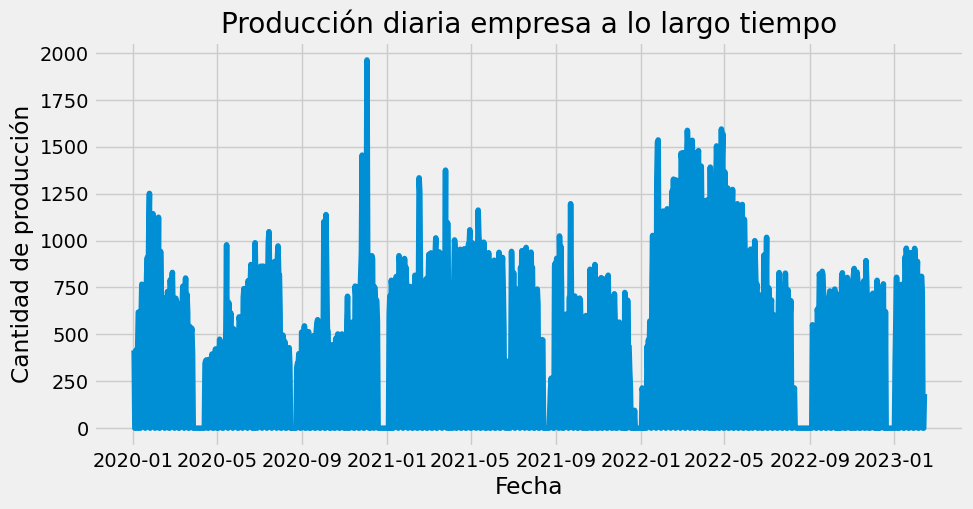

In [32]:
plot_daily_production(df_bombs, 'Producción diaria empresa a lo largo tiempo')

>Gráfico 2: Series temporales de producción a lo largo del tiempo (por día) para el año 2020

/var/folders/th/fw9vgnb57s3c_wc29f04z42h0000gn/T/ipykernel_49560/2656114292.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_daily = df.resample('D', on='start_date').sum()


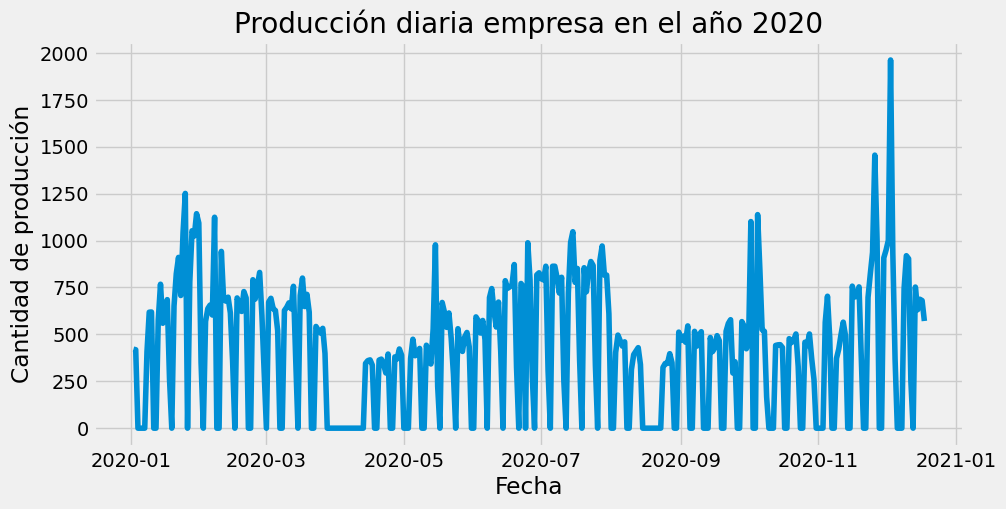

In [33]:
year = 2020
plot_daily_production(df_bombs[df_bombs.start_date.dt.year == year], f'Producción diaria empresa en el año {year}')

>Gráfico 3: Comparación producción mensual por año

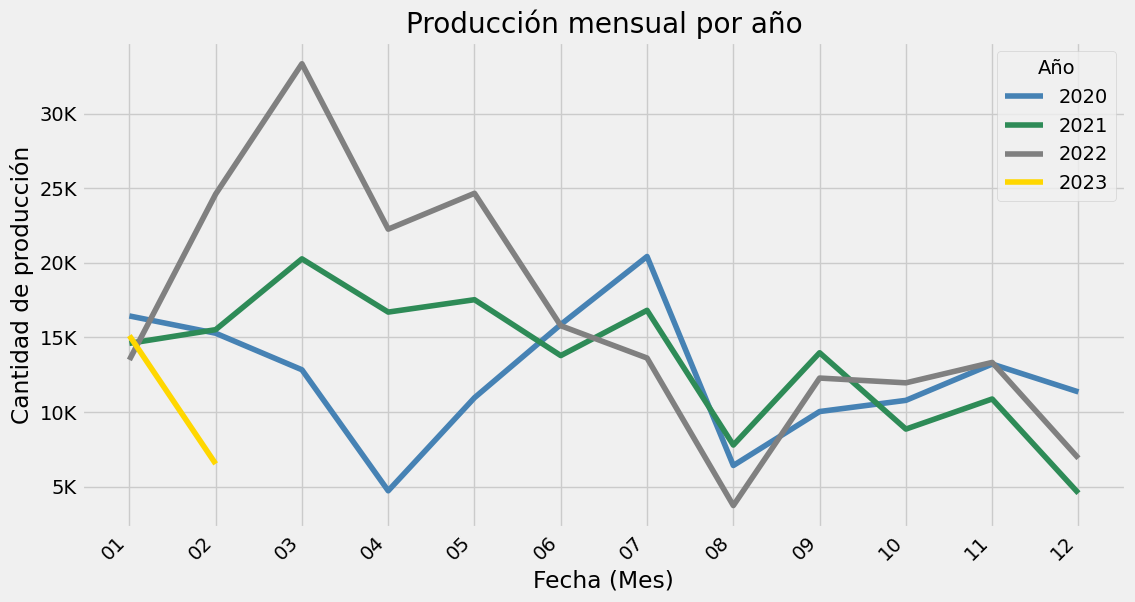

In [34]:
data = df_bombs.copy()
# Crear una columna solo con el mes y el día
data['month'] = data.end_date.dt.strftime('%m')

# Agrupar por año, mes y día, y calcular la cantidad de producción diaria
data_daily = data.groupby([data.end_date.dt.year, 'month'])['good_qty'].sum().reset_index()
data_daily.columns = ['year', 'month', 'good_qty']

# Función para formatear las etiquetas del eje y
def thousands_formatter(x, pos):
    return f'{int(x / 1e3)}K'

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Obtener los años únicos
unique_years = data_daily['year'].unique()

# Colors
color_pal = sns.color_palette(['steelblue', 'seagreen', 'gray', 'gold', 'magenta', 'yellow'])

for i, year in enumerate(unique_years):
    yearly_data = data_daily[data_daily['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['good_qty'], label=str(int(year)), color=color_pal[i])

plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de producción')
plt.title('Producción mensual por año')

# Aplicar el formateador al eje y
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Año')
plt.xticks(rotation=45, ha='right')
plt.show()

#### ¿Cuáles son los tipos de bombas más y menos producidos?

In [35]:
df_bombs.bomb_type.nunique()

706

Dada la cantidad de tipos de bombas, revisaremos las 20 más producidos y las 20 menos producidos

>Gráfico 4: Cantidad producida de las 20 tipos de bombas más demandados

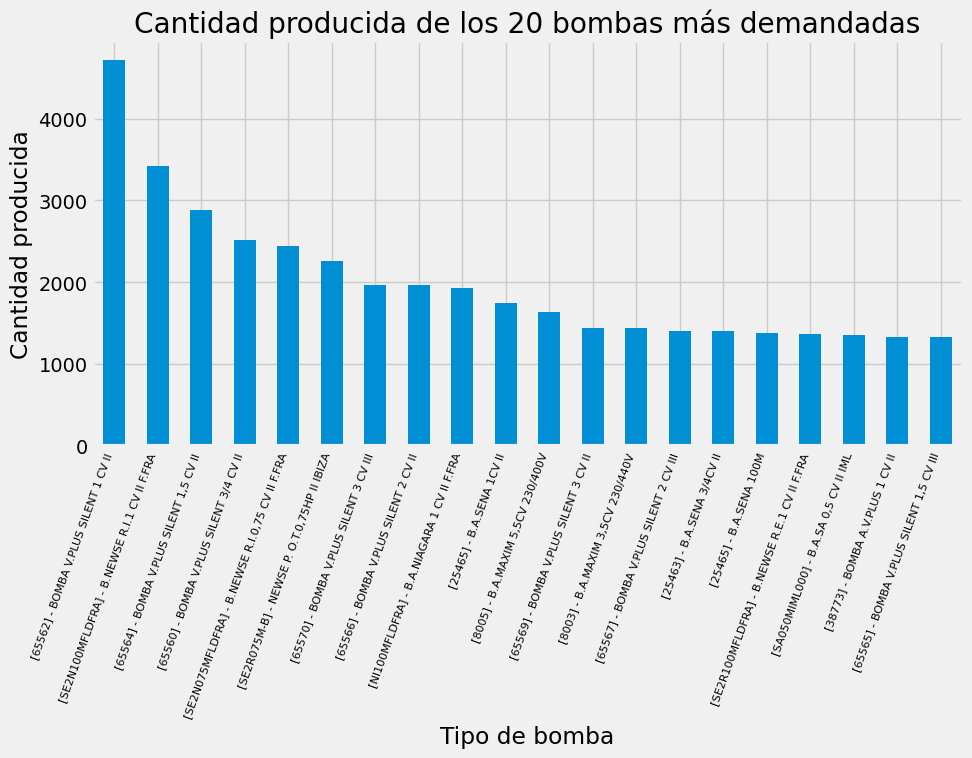

In [36]:
material_counts = df_bombs.groupby(['bomb_type', 'bomb_description'])['good_qty'].size().reset_index(name='count').sort_values(by='count', ascending=False)
material_counts['code_description'] = '[' + material_counts['bomb_type'].astype(str) + '] - ' + material_counts['bomb_description']
material_counts[0:20].plot(kind='bar', x='code_description', figsize=(10, 5))
plt.xlabel('Tipo de bomba')
plt.ylabel('Cantidad producida')
plt.title('Cantidad producida de los 20 bombas más demandadas')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().legend().set_visible(False)
plt.show()

>Gráfico 4: Cantidad producida de los 20 materiales menos demandados

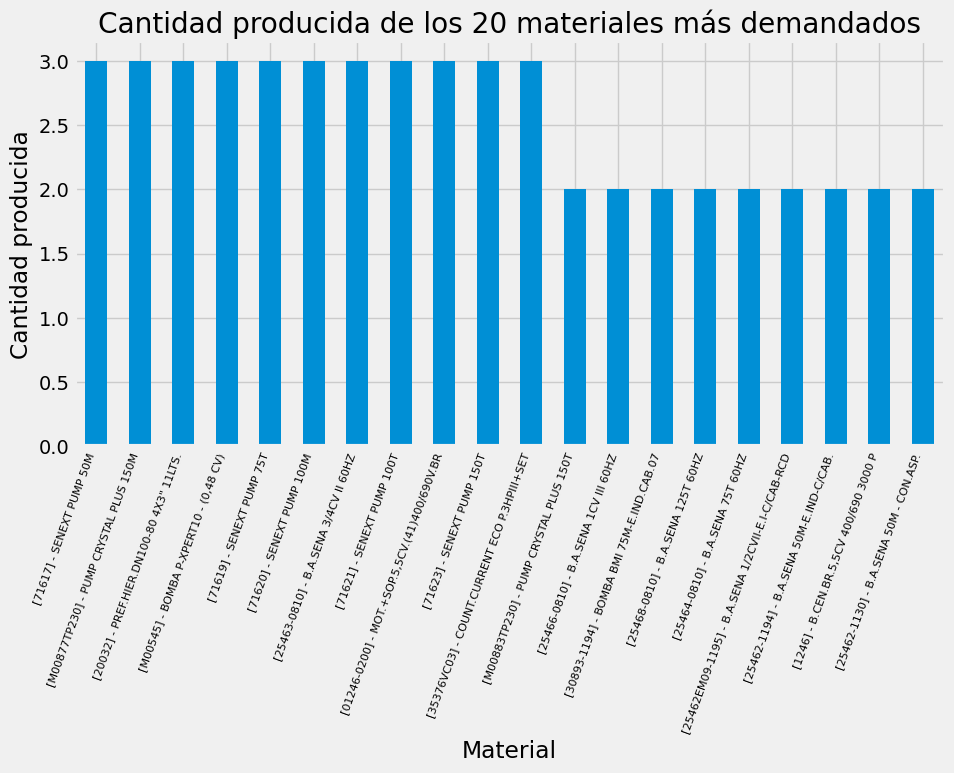

In [37]:
material_counts[-20:].plot(kind='bar', x='code_description', figsize=(10, 5))
plt.xlabel('Material')
plt.ylabel('Cantidad producida')
plt.title('Cantidad producida de los 20 materiales más demandados')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().legend().set_visible(False)
plt.show()

#### ¿Cuáles son los materiales más defectuosos?

Dada la cantidad de materiales, revisaremos los 20 más defectuosos y los 20 menos defectuosos
>Se revisa en la data que entre todos los registros, no hay ninguno que tenga QtyMalas_Total y CantidadMalas

#### ¿Cuáles son las máquinas que más y menos producen?

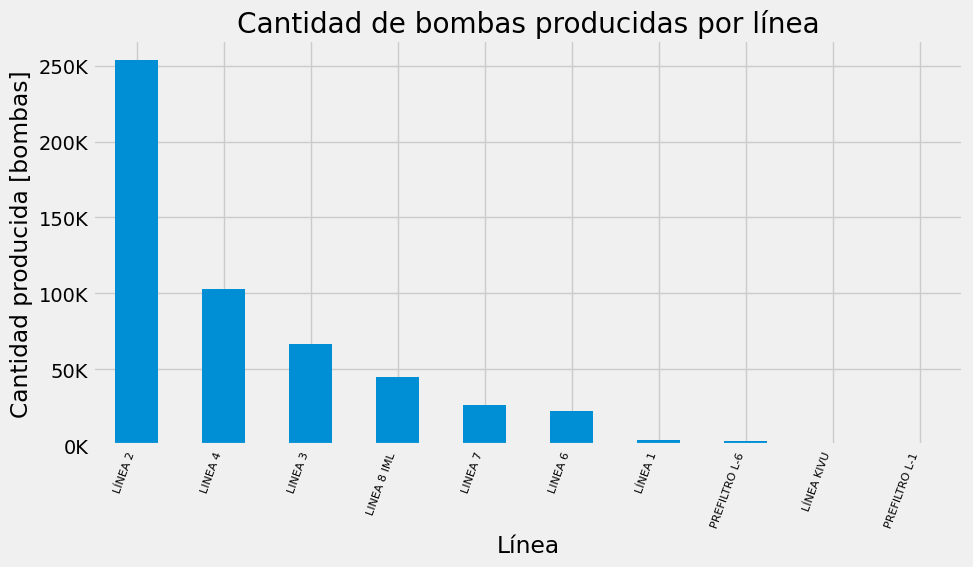

In [38]:
bomb_counts = df_bombs.groupby(['line'])['good_qty'].sum().reset_index(name='count').sort_values(by='count', ascending=False)
bomb_counts.plot(kind='bar', x='line', figsize=(10, 5))
plt.xlabel('Línea')
plt.ylabel('Cantidad producida [bombas]')
plt.title('Cantidad de bombas producidas por línea')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().yaxis.set_major_formatter(thousand_formatter)
plt.gca().legend().set_visible(False)
plt.show()

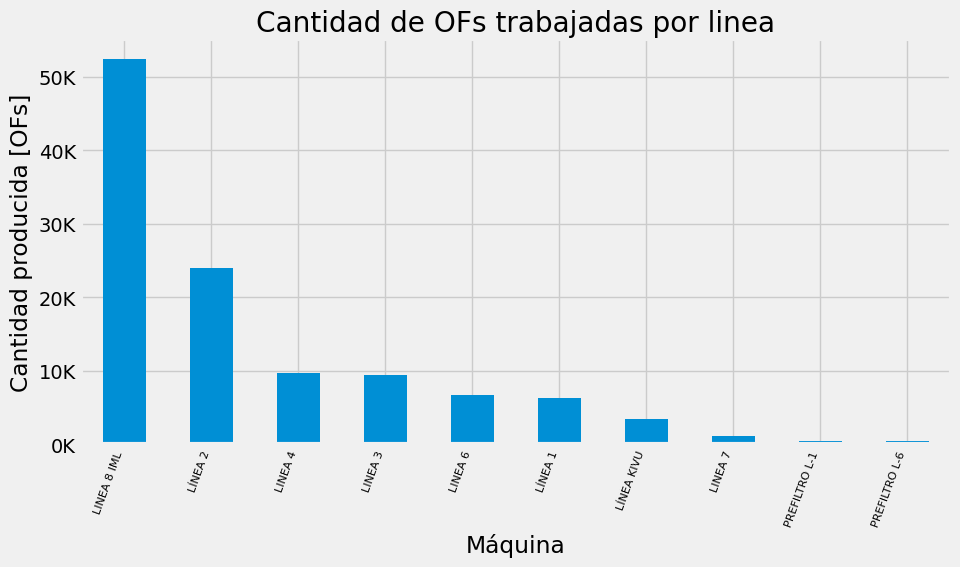

In [39]:
bomb_counts = df_bombs.groupby(['line'])['order'].size().reset_index(name='count').sort_values(by='count', ascending=False)
bomb_counts.plot(kind='bar', x='line', figsize=(10, 5))
plt.xlabel('Máquina')
plt.ylabel('Cantidad producida [OFs]')
plt.title('Cantidad de OFs trabajadas por linea')

plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().yaxis.set_major_formatter(thousand_formatter)
plt.gca().legend().set_visible(False)
plt.show()

#### ¿Cuáles son los tiempos de producción de las lineas?

In [40]:
df_of[df_of.time_diff_minutes_calculated > 6000]

order bomb_type     line  plan_qty  total_good_qty  total_bad_qty  \
4561  5346312     PT001  LINEA 4       1.5             0.0            0.0   

      good_qty  bad_qty              start_date                end_date  \
4561       0.0      0.0 2022-06-15 13:16:05.667 2022-08-04 11:11:06.277   

      theorical_diff  theorical_time  time_diff_seconds_calculated  \
4561          376798            10.0                     376796.78   

      time_diff_minutes_calculated  total_operators_minutes  \
4561                   6279.946333               17392.3836   

                                 operators_distinct_ids  registers_qty  \
4561  [9374, 9348, 9109, 9403, 8830, 5033, 654, 8860...             76   

      operators_distinct_qty  theorical_qty  theorical_qty_round  performance  \
4561                      12     1739.23836               1739.0          0.0   

      performance_round  
4561                0.0

In [41]:
df_of['time_diff_hours_calculated'] = df_of.time_diff_minutes_calculated/60

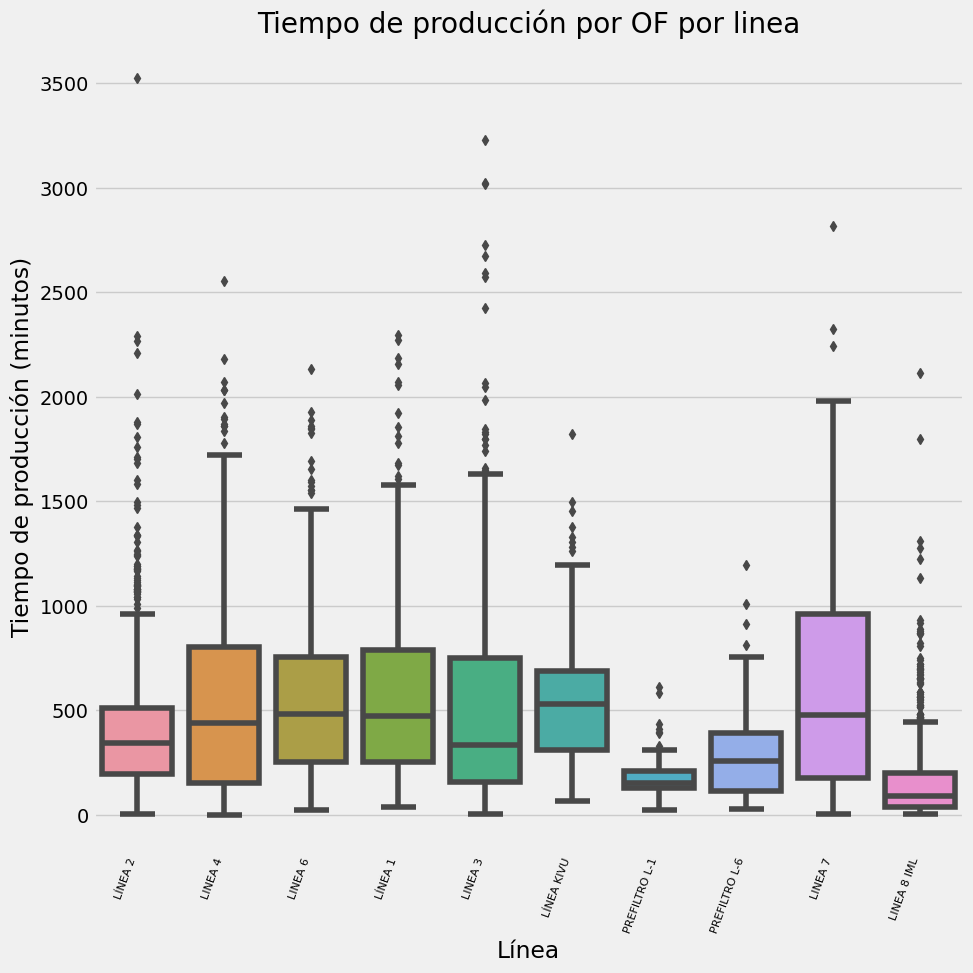

In [42]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_of[df_of.time_diff_minutes_calculated < 6000], x='line', y='time_diff_minutes_calculated')
plt.xlabel('Línea')
plt.ylabel('Tiempo de producción (minutos)')
plt.title('Tiempo de producción por OF por linea')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.show()

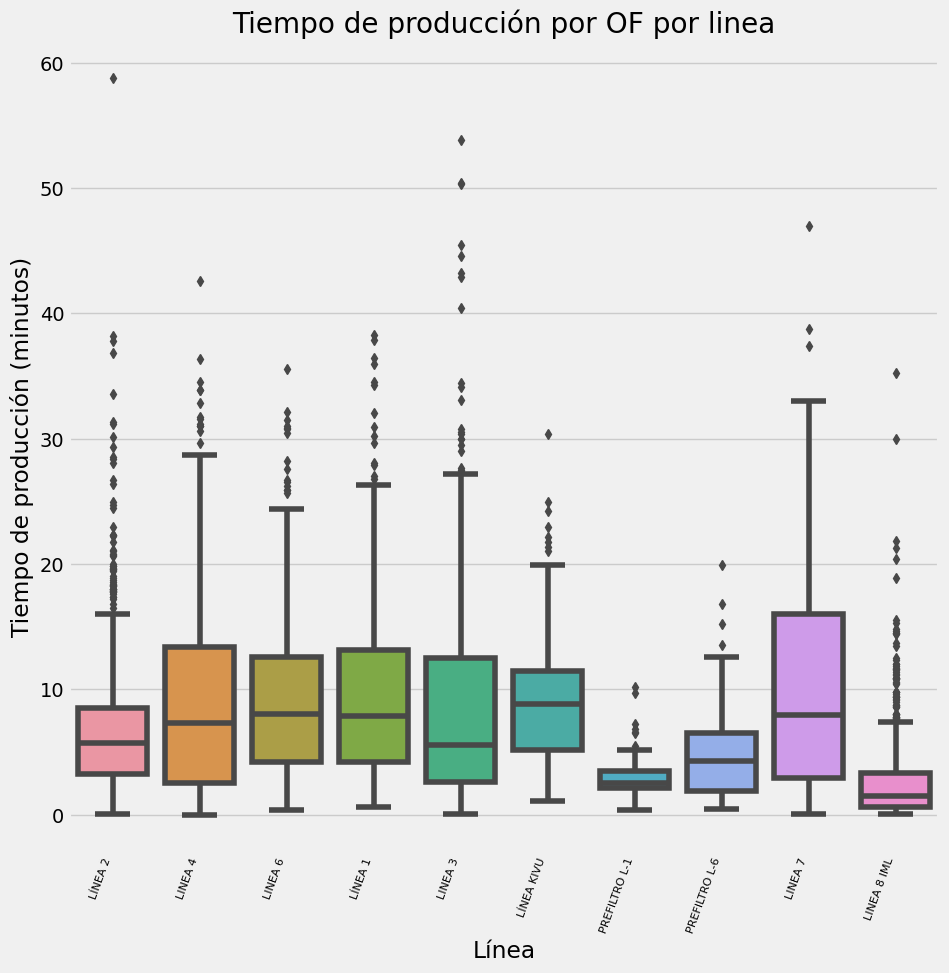

In [43]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_of[df_of.time_diff_minutes_calculated < 6000], x='line', y='time_diff_hours_calculated')
plt.xlabel('Línea')
plt.ylabel('Tiempo de producción (minutos)')
plt.title('Tiempo de producción por OF por linea')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.show()

#### Gráficas de performance por linea

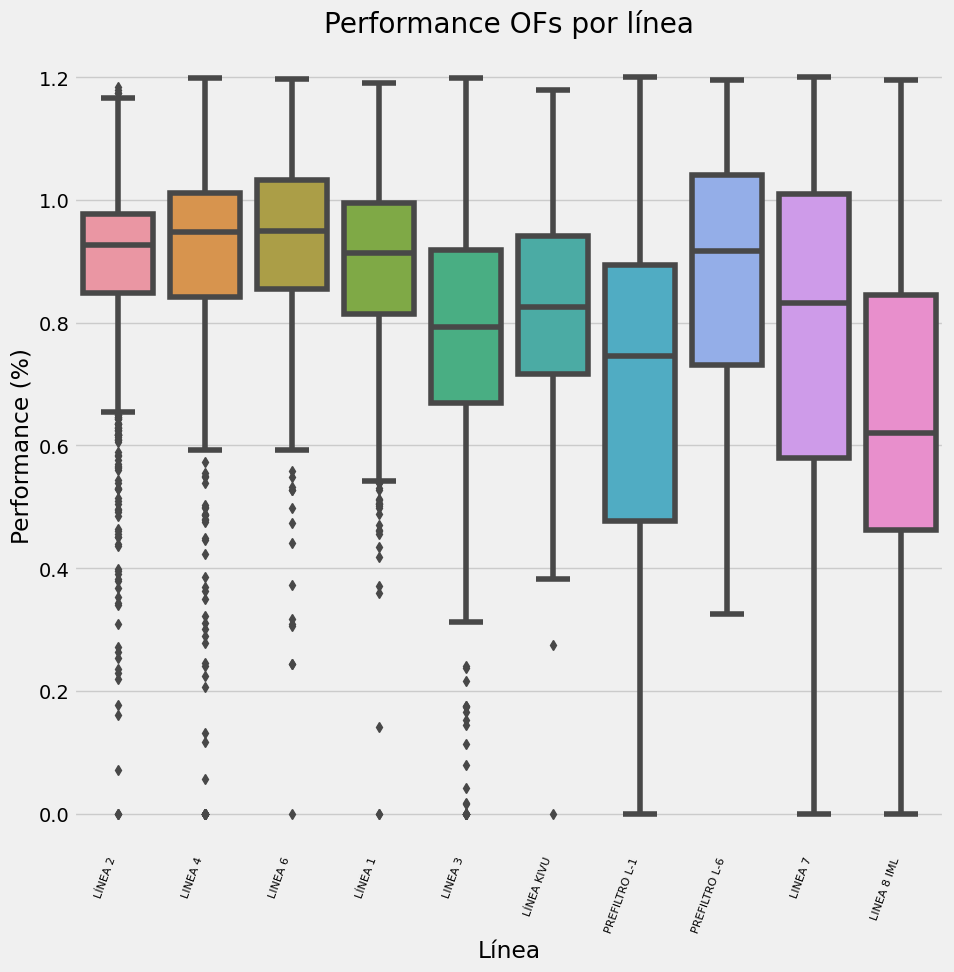

In [44]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_of, x='line', y='performance')
plt.xlabel('Línea')
plt.ylabel('Performance (%)')
plt.title('Performance OFs por línea')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.show()

#### ¿Cuáles es la relación entre la cantidad teórica y la cantidad real?

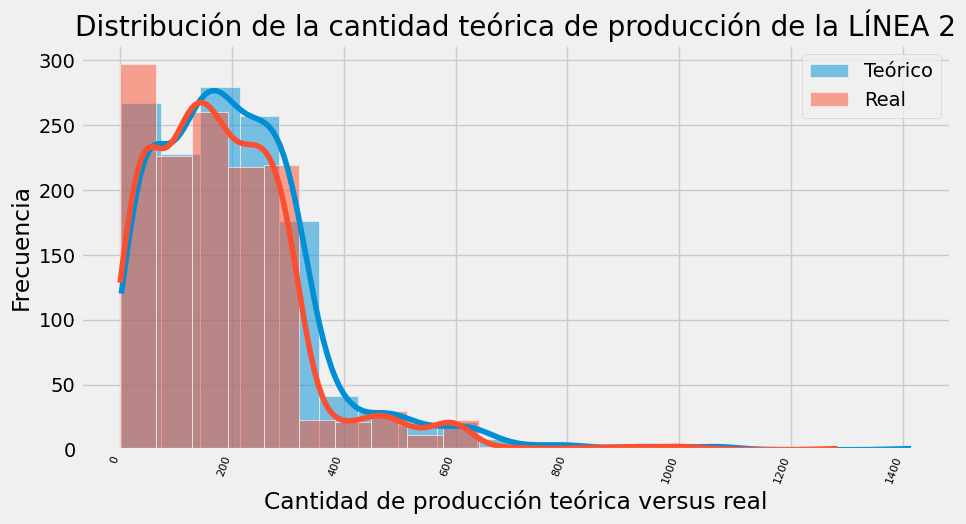

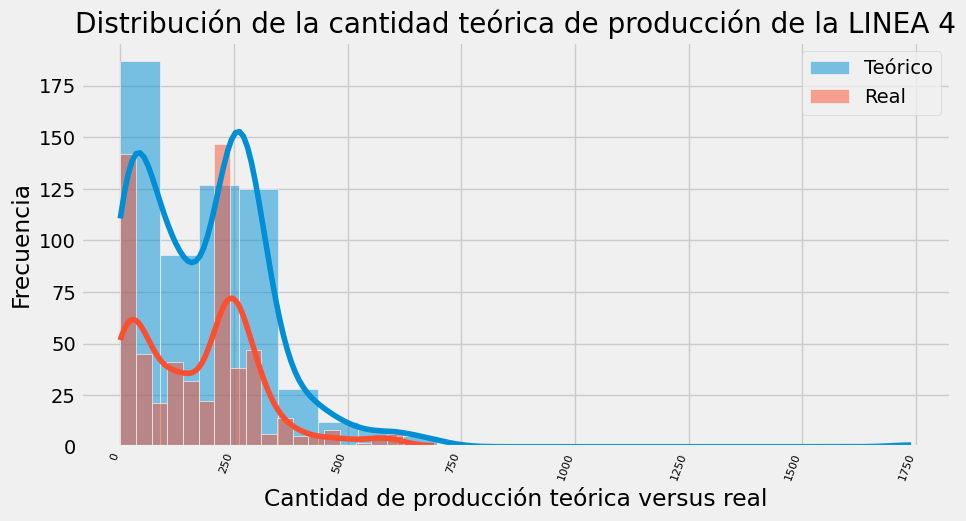

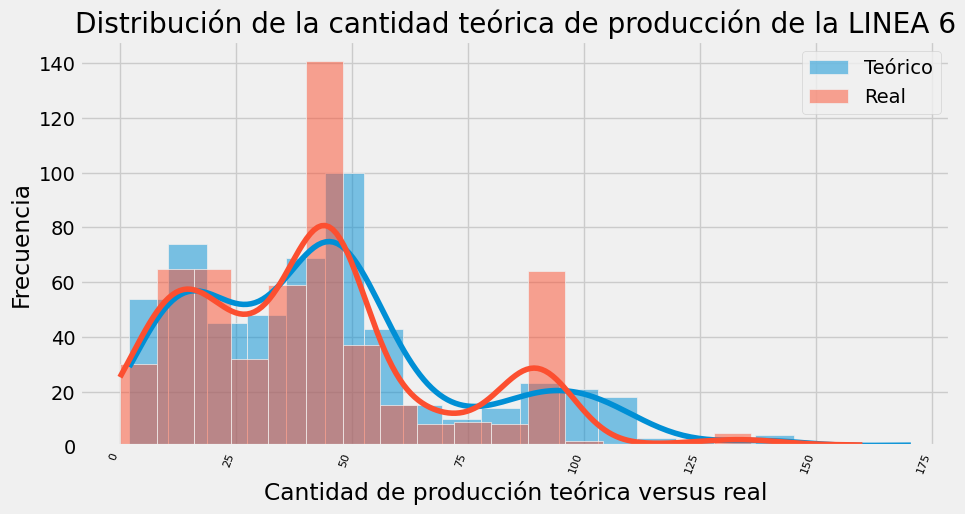

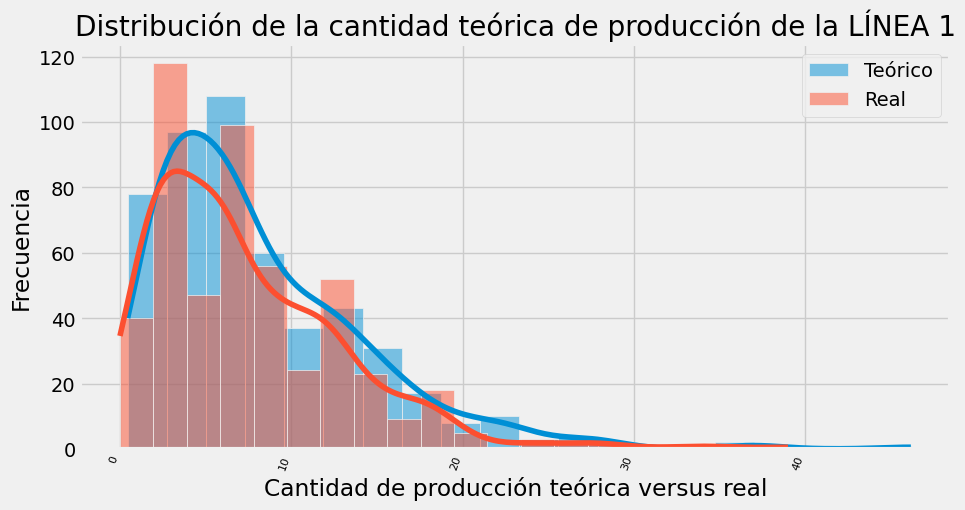

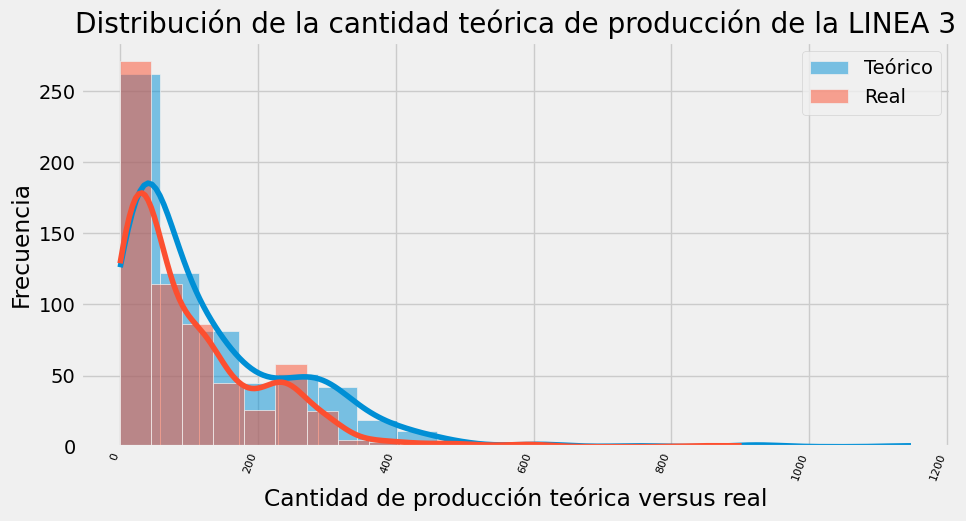

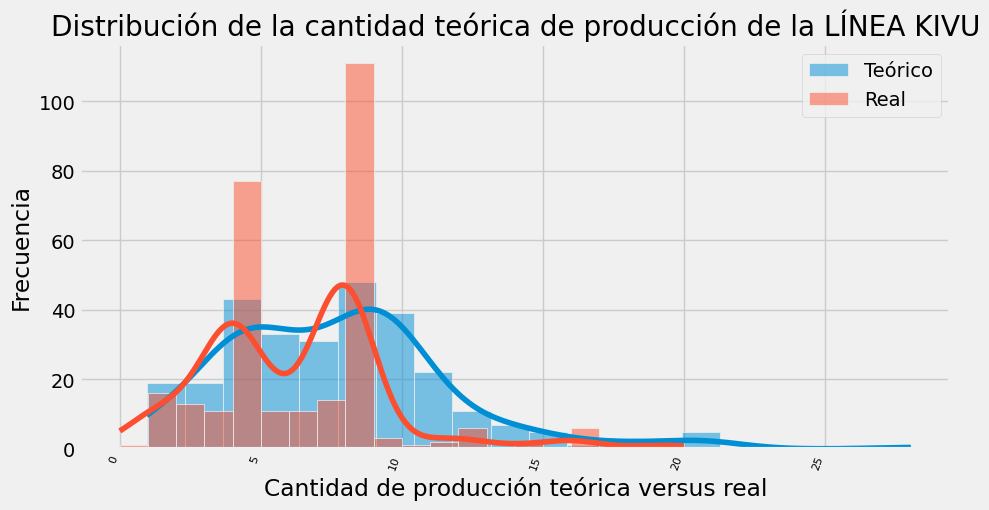

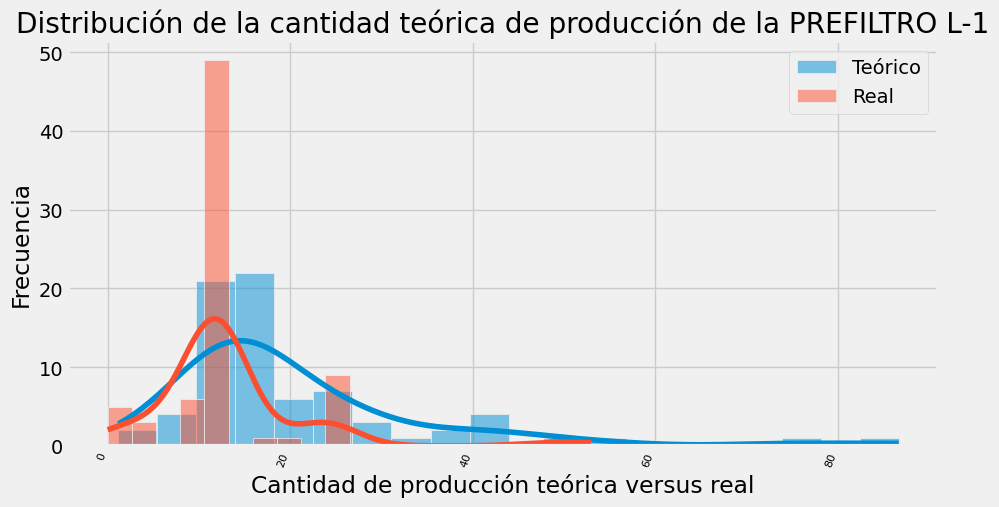

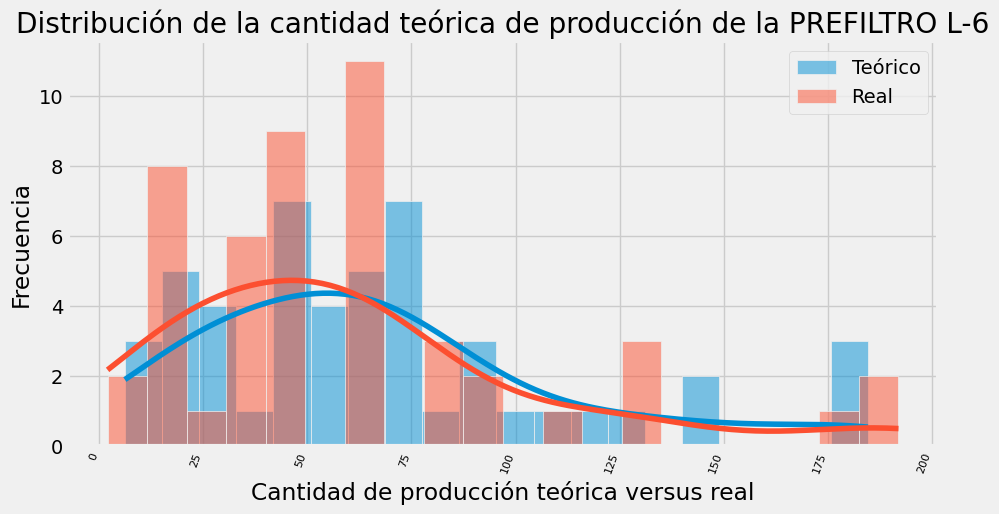

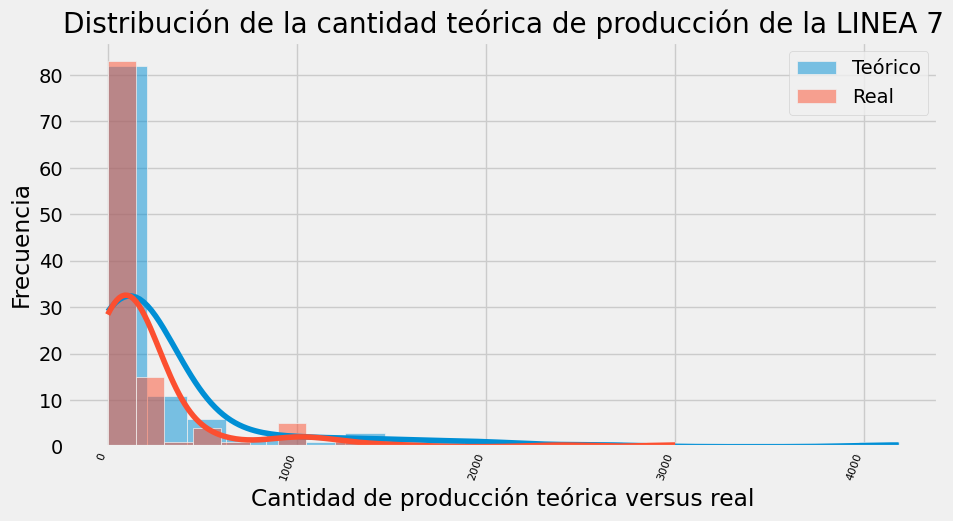

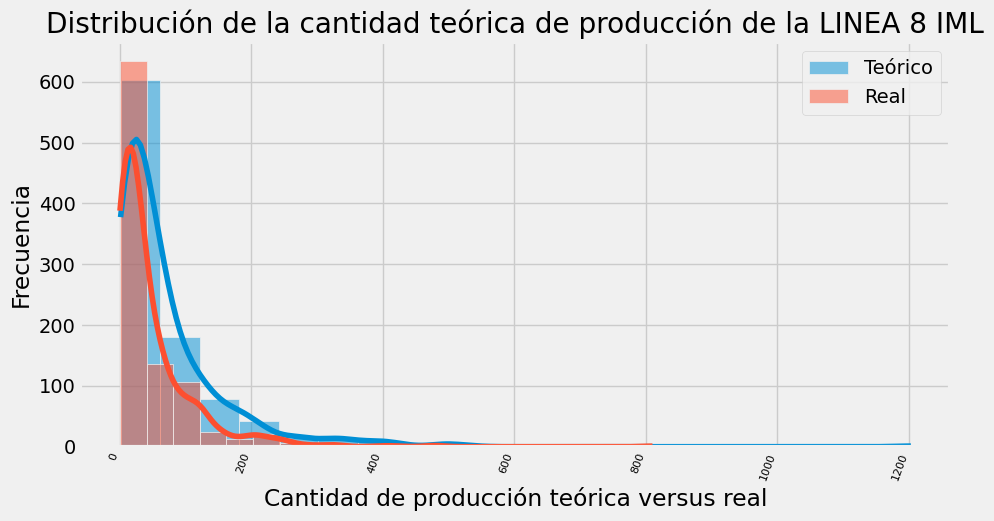

In [45]:
lines = df_of.line.unique()

for line in lines:
    data = df_of[df_of.line == line].sort_values(by='theorical_qty')

    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x='theorical_qty', bins=20, kde=True, label='Teórico')
    sns.histplot(data=data, x='good_qty', bins=20, kde=True, label='Real')
    plt.xlabel('Cantidad de producción teórica versus real')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de la cantidad teórica de producción de la {line}')
    plt.xticks(rotation=70, ha='right', fontsize=8)
    plt.gca().legend().set_visible(True)
    plt.show()

#### Performance

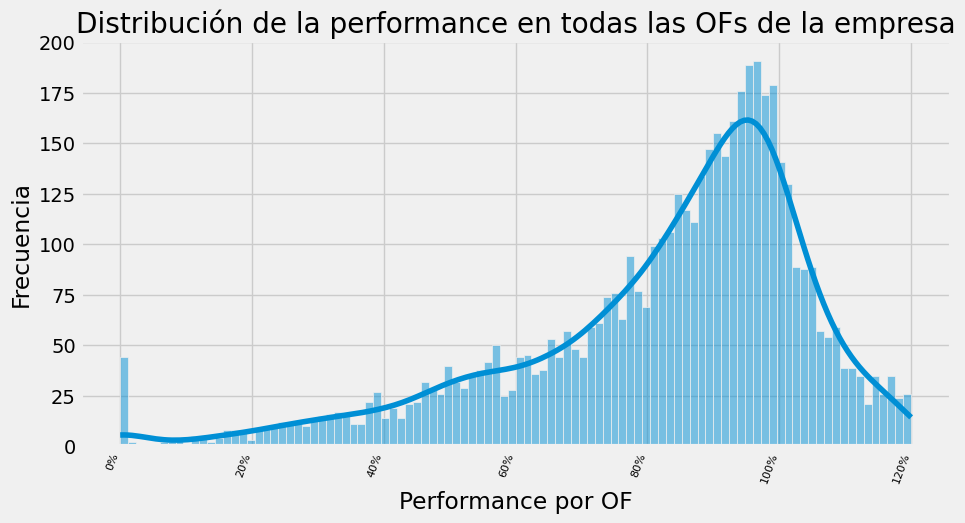

In [46]:
data = df_of.sort_values(by='performance')

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='performance', bins=100, kde=True)
plt.xlabel('Performance por OF')
plt.ylabel('Frecuencia')
plt.title('Distribución de la performance en todas las OFs de la empresa')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().xaxis.set_major_formatter(percentage_formatter)
plt.show()

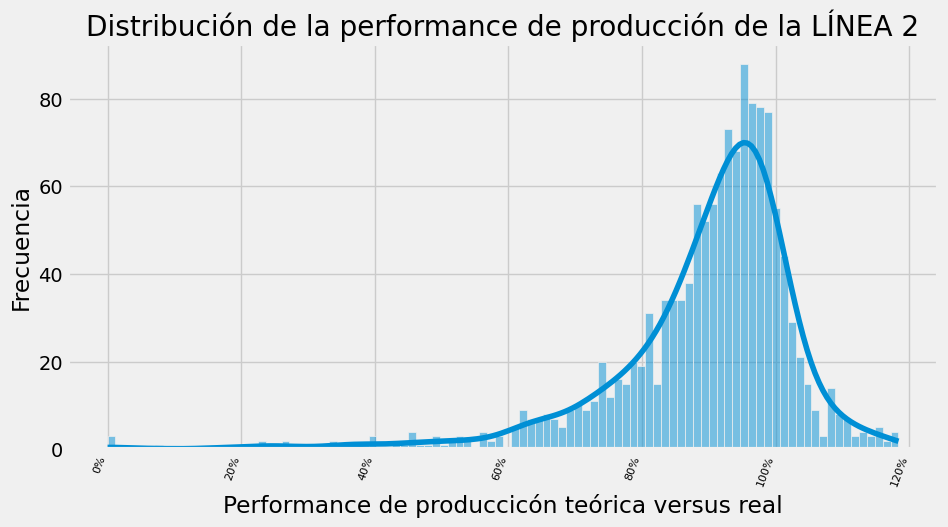

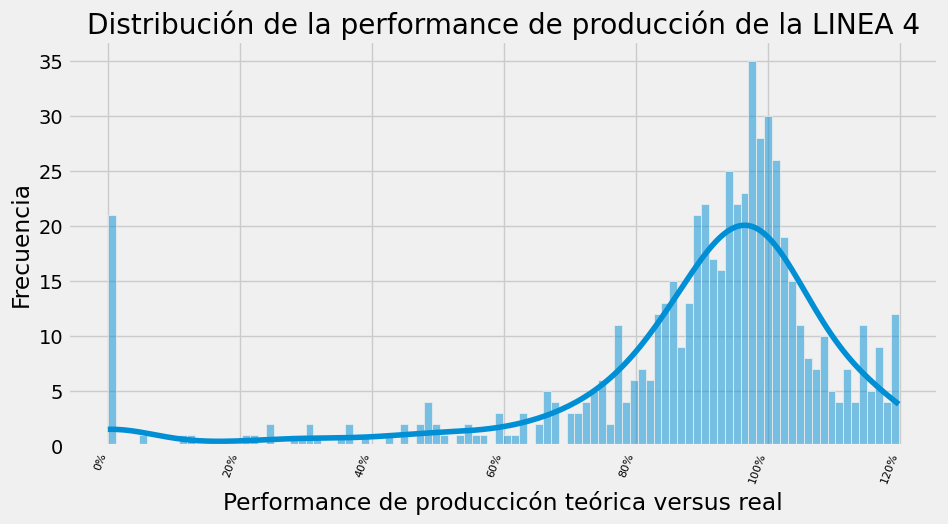

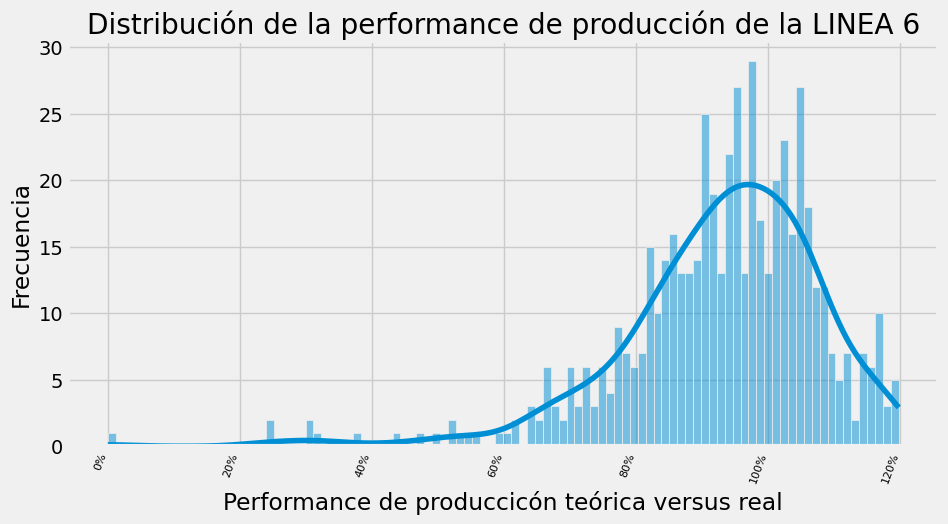

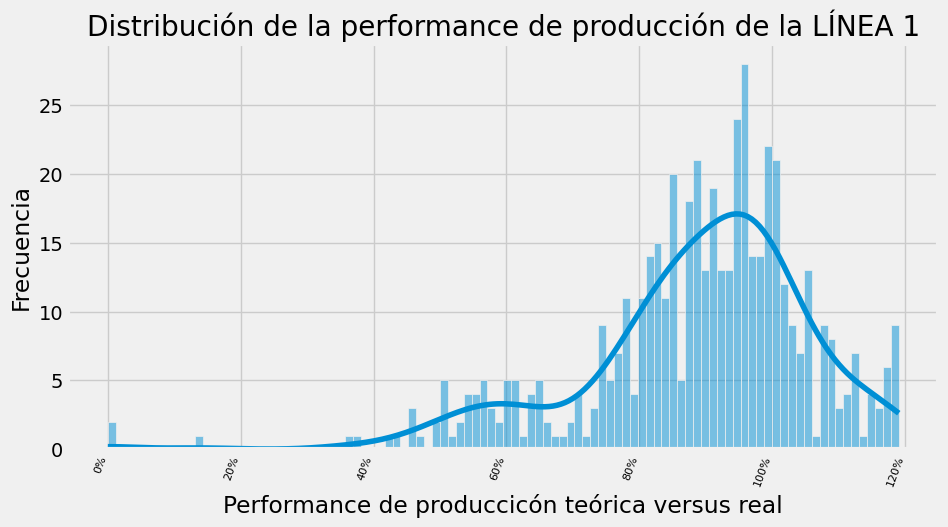

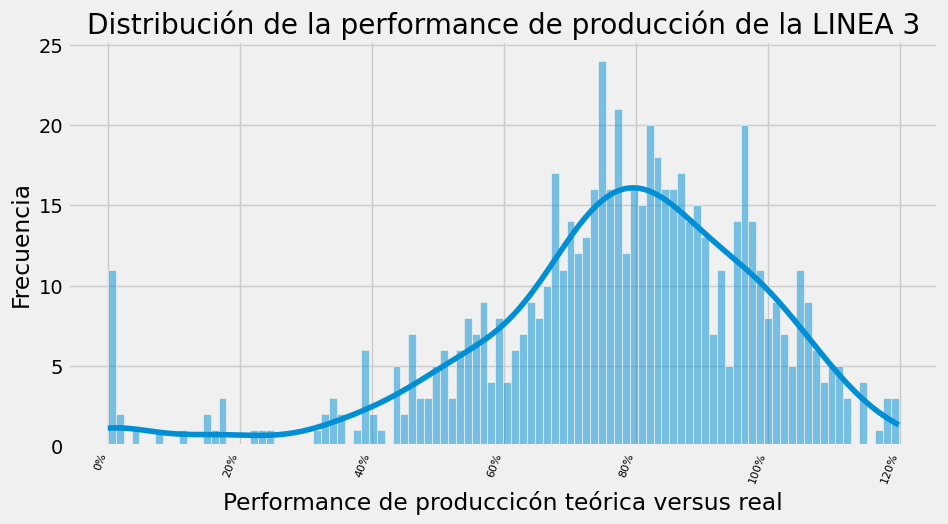

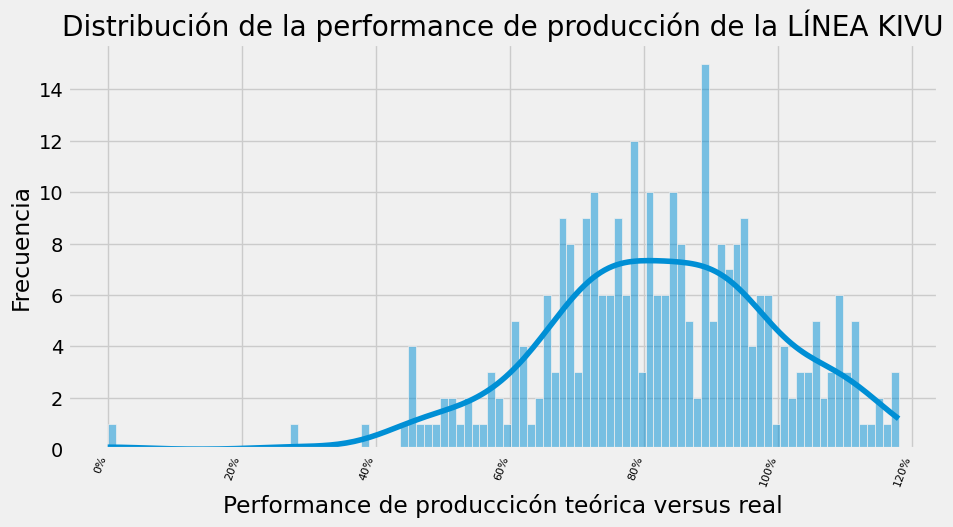

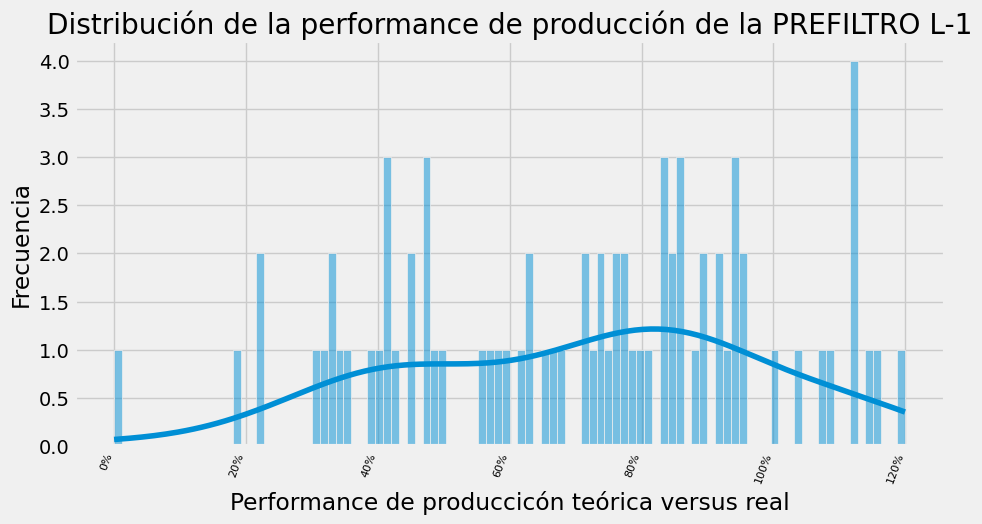

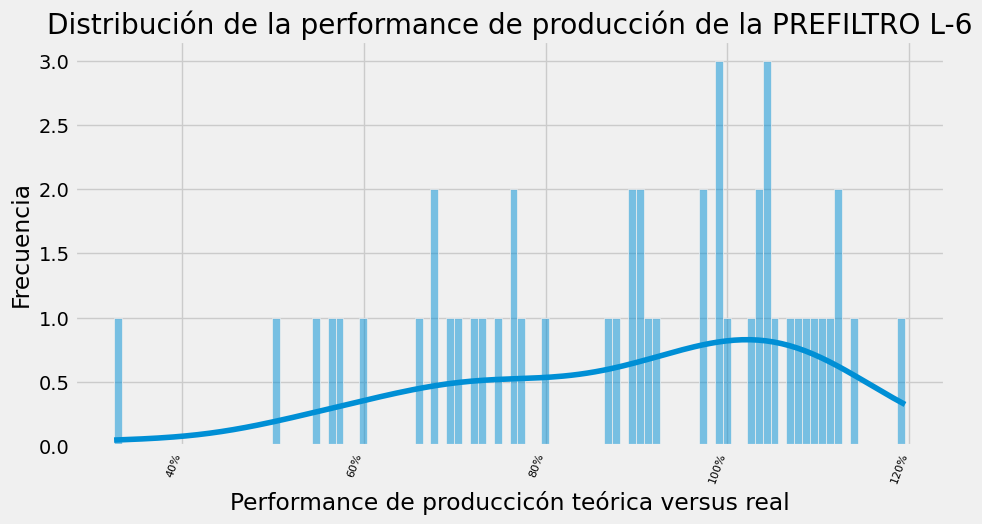

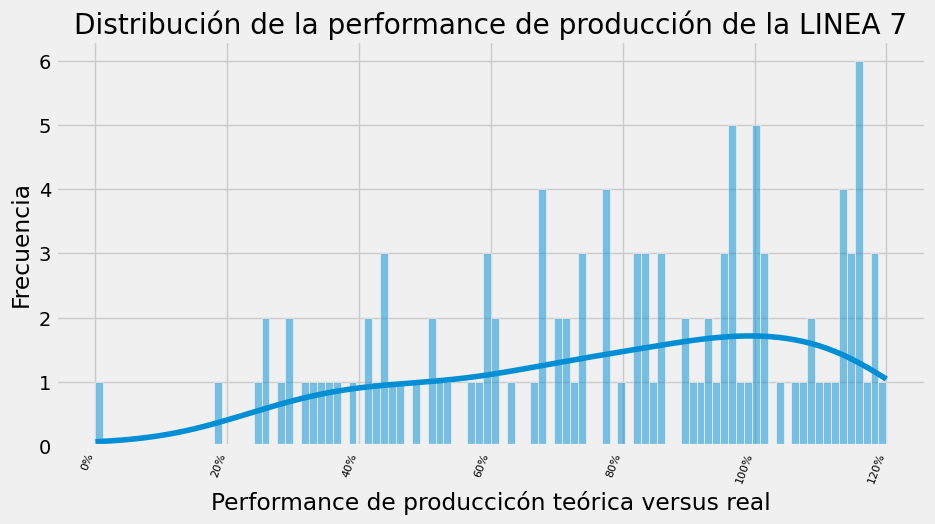

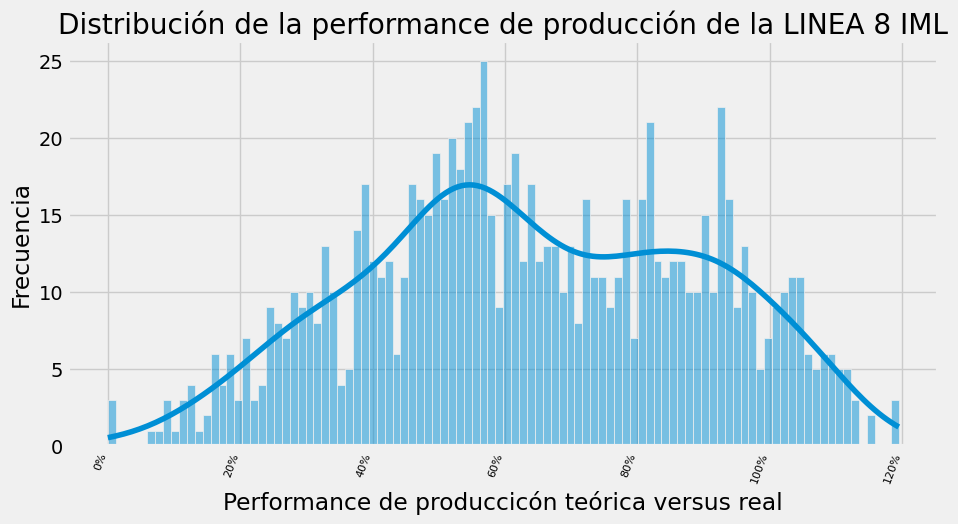

In [47]:
lines = df_of.line.unique()

for line in lines:
    data = df_of[df_of.line == line].sort_values(by='performance')

    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x='performance', bins=100, kde=True)
    plt.xlabel('Performance de produccicón teórica versus real')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de la performance de producción de la {line}')
    plt.xticks(rotation=70, ha='right', fontsize=8)
    plt.gca().xaxis.set_major_formatter(percentage_formatter)
    plt.show()

In [48]:
df_gouped = df_of.groupby('line').agg(of_qty=('order', 'count'), mean_performance=('performance', 'mean')).reset_index().sort_values(by='mean_performance')
df_gouped

line  of_qty  mean_performance
4    LINEA 8 IML     949          0.638813
8  PREFILTRO L-1      76          0.703890
0        LINEA 3     644          0.767144
3        LINEA 7     114          0.787393
7     LÍNEA KIVU     288          0.822253
1        LINEA 4     588          0.883513
9  PREFILTRO L-6      49          0.883730
5        LÍNEA 1     501          0.885997
6        LÍNEA 2    1341          0.893397
2        LINEA 6     545          0.928070

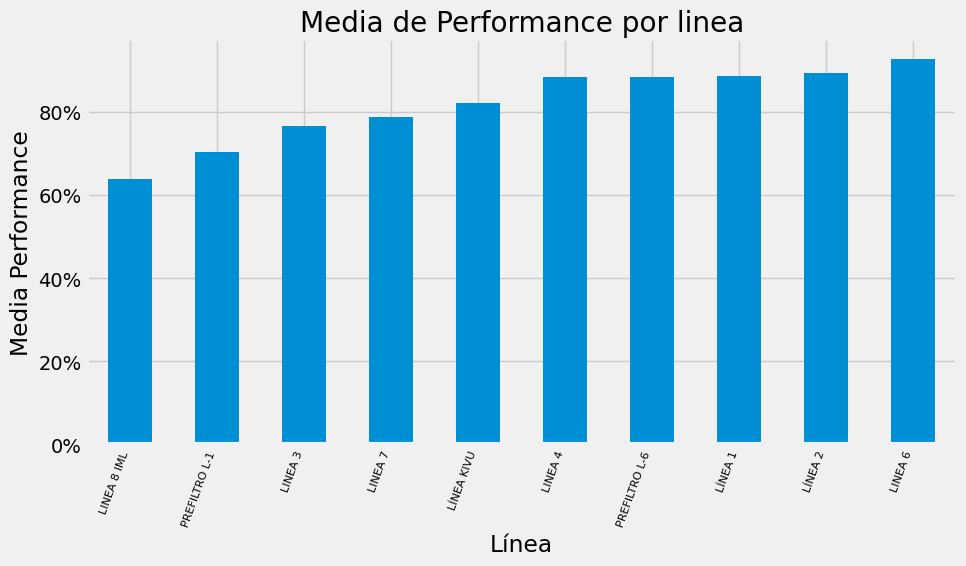

In [49]:
df_gouped.plot(kind='bar', x='line', y='mean_performance', figsize=(10, 5))
plt.xlabel('Línea')
plt.ylabel('Media Performance')
plt.title('Media de Performance por linea')

plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().yaxis.set_major_formatter(percentage_formatter)
plt.gca().legend().set_visible(False)
plt.show()

## Exploración por operarios

### Generación de dataframe operadores-OFs en general

In [91]:
df_of.head()

order   bomb_type     line  plan_qty  total_good_qty  total_bad_qty  \
0   274185     HPS050M  LÍNEA 2       1.0             0.0            0.0   
1  5029646       25461  LINEA 4       1.0            17.0            0.0   
2  5070828       11509  LINEA 6      12.0             0.0            0.0   
4  5157110  01226-0890  LÍNEA 1       2.0             2.0            0.0   
5  5158184    11509INT  LINEA 6      12.0            12.0            0.0   

   good_qty  bad_qty              start_date                end_date  \
0       0.0      0.0 2020-02-28 07:47:47.760 2021-02-18 08:44:11.897   
1       0.0      0.0 2020-05-26 10:42:49.543 2021-04-07 05:41:01.177   
2       0.0      0.0 2020-04-17 05:47:54.977 2022-08-10 06:10:35.247   
4       2.0      0.0 2020-01-27 12:04:52.480 2020-01-28 07:26:01.683   
5      12.0      0.0 2020-01-18 11:48:44.873 2020-01-18 12:46:26.833   

   theorical_diff  theorical_time  time_diff_seconds_calculated  \
0           13189           13.35                     13189.211   
1             120            8.80                       118.318   
2           32671           17.40                     32671.480   
4           12623           85.58                     12622.856   
5            3462           19.50                      3461.960   

   time_diff_minutes_calculated  total_operators_minutes  \
0                    219.820183               590.426267   
1                      1.971967                 3.112383   
2                    544.524667               594.821567   
4                    210.380933               210.380933   
5                     57.699333               230.797333   

                              operators_distinct_ids  registers_qty  \
0  [287, 8615, 9105, 8250, 9104, 8860, 8177, 8164...             10   
1                     [5020, 8822, 8860, 9120, 8866]              4   
2                                 [5033, 9436, 9142]              8   
4                                             [5025]              8   
5                             [287, 8945, 504, 1007]              2   

   operators_distinct_qty  theorical_qty  theorical_qty_round  performance  \
0                      11      44.226687                 44.0     0.000000   
1                       5       0.353680                  0.0     0.000000   
2                       3      34.185148                 34.0     0.000000   
4                       1       2.458296                  2.0     0.813572   
5                       4      11.835761                 12.0     1.013877   

   performance_round  time_diff_hours_calculated performance_category  
0                0.0                    3.663670             0% - 10%  
1                NaN                    0.032866             0% - 10%  
2                0.0                    9.075411             0% - 10%  
4                1.0                    3.506349            80% - 90%  
5                1.0                    0.961656          100% - 110%

In [93]:
data_operators = {
    'id': [], 'of_ids': [], 'of_performances': [], 'of_qty': [],
    'line_ids': [], 'lines_qty': [], 'bomb_type_ids': [], 'bomb_types_qty': [],
    'min_registered_date': [], 'max_registered_date': []
}

for index, row in df_of.iterrows():
    for operator_id in row['operators_distinct_ids']:
        if operator_id not in data_operators['id']:
            data_operators['id'].append(operator_id)
            data_operators['of_ids'].append([row['order']]) 
            data_operators['of_performances'].append([row['performance']])
            data_operators['of_qty'].append(1)
            data_operators['line_ids'].append([row['line']])
            data_operators['lines_qty'].append(1)
            data_operators['bomb_type_ids'].append([row['bomb_type']])
            data_operators['bomb_types_qty'].append(1)
            data_operators['min_registered_date'].append(row['start_date'])
            data_operators['max_registered_date'].append(row['end_date'])
        else:
            oper_index = data_operators['id'].index(operator_id)
            data_operators['of_ids'][oper_index].append(row['order'])
            data_operators['of_performances'][oper_index].append(row['performance'])
            data_operators['of_qty'][oper_index] += 1
            if row['line'] not in data_operators['line_ids'][oper_index]:
                data_operators['line_ids'][oper_index].append(row['line'])
                data_operators['lines_qty'][oper_index] += 1
            if row['bomb_type'] not in data_operators['bomb_type_ids'][oper_index]:
                data_operators['bomb_type_ids'][oper_index].append(row['bomb_type'])
                data_operators['bomb_types_qty'][oper_index] += 1
            if row['start_date'] < data_operators['min_registered_date'][oper_index]:
                data_operators['min_registered_date'][oper_index] = row['start_date']
            if row['end_date'] > data_operators['max_registered_date'][oper_index]:
                data_operators['max_registered_date'][oper_index] = row['end_date']
     
     
df_operators = pd.DataFrame(data_operators)            
df_operators['mean_performance'] = df_operators.of_performances.apply(lambda x: sum(x)/len(x))
df_operators['std_performance'] = df_operators.of_performances.apply(lambda x: np.std(x))
df_operators['min_performance'] = df_operators.of_performances.apply(lambda x: min(x))
df_operators['max_performance'] = df_operators.of_performances.apply(lambda x: max(x))
print(df_operators.shape)
df_operators.head()

(114, 14)


id                                             of_ids  \
0   287  [274185, 5158184, 5161187, 5162031, 5162172, 5...   
1  8615  [274185, 5159134, 5161410, 5162172, 5163398, 5...   
2  9105  [274185, 5189522, 5210073, 5212904, 5213259, 5...   
3  8250  [274185, 5167564, 5174138, 5177030, 5178178, 5...   
4  9104  [274185, 5161410, 5201226, 5206185, 5212222, 5...   

                                     of_performances  of_qty  \
0  [0.0, 1.0138765323689471, 0.8528714857821097, ...     580   
1  [0.0, 0.7064084560253582, 1.1838276777960204, ...    1218   
2  [0.0, 0.6612374885761816, 1.0049209922924365, ...     143   
3  [0.0, 0.9201413514952291, 0.930609219994463, 0...     147   
4  [0.0, 1.1838276777960204, 0.7990761731314033, ...     668   

                                            line_ids  lines_qty  \
0  [LÍNEA 2, LINEA 6, PREFILTRO L-6, LINEA 3, LIN...          6   
1  [LÍNEA 2, LINEA 4, LINEA 3, LINEA 6, PREFILTRO...          5   
2                                 [LÍNEA 2, LINEA 3]          2   
3  [LÍNEA 2, LINEA 4, LINEA 3, LINEA 6, LINEA 8 IML]          5   
4                        [LÍNEA 2, LINEA 3, LINEA 4]          3   

                                       bomb_type_ids  bomb_types_qty  \
0  [HPS050M, 11509INT, 8005, 72560, 65570, 65563,...             134   
1  [HPS050M, 65567, 72556, 72560, 65570, 65563, 6...             106   
2  [HPS050M, 65558, 65564, 65562, 65557, 65566, 6...              41   
3  [HPS050M, 25463, 38771, 25462, M00874TP115, 38...             120   
4  [HPS050M, 72556, 15247, 65560, 15240, 65567, 6...              94   

      min_registered_date     max_registered_date  mean_performance  \
0 2020-01-02 06:03:06.473 2023-02-13 07:37:39.957          0.896693   
1 2020-01-02 05:49:27.273 2023-02-13 07:37:39.957          0.898075   
2 2020-02-28 07:47:47.760 2021-04-07 07:19:46.387          0.885859   
3 2020-02-19 08:46:27.460 2023-02-13 07:38:14.120          0.830937   
4 2020-02-28 07:47:47.760 2023-02-13 10:02:13.797          0.874439   

   std_performance  min_performance  max_performance  
0         0.149603              0.0         1.191297  
1         0.140513              0.0         1.186424  
2         0.159236              0.0         1.149069  
3         0.218657              0.0         1.194739  
4         0.160751              0.0         1.197646

Información de cómo distribuyen los operadores

In [90]:
print(f'''
Cantidad de trabajadores: {df_operators.id.nunique()}
Lineas por trabajador --> Media: {round(df_operators.lines_qty.mean(), 3)} | Min: {df_operators.lines_qty.min()} | Max: {df_operators.lines_qty.max()}
Bombas por trabajador --> Media: {round(df_operators.bomb_types_qty.mean(), 3)} | Min: {df_operators.bomb_types_qty.min()} | Max: {df_operators.bomb_types_qty.max()}
''')


Cantidad de trabajadores: 114
Lineas por trabajador --> Media: 2.991 | Min: 1 | Max: 9
Bombas por trabajador --> Media: 54.877 | Min: 1 | Max: 330



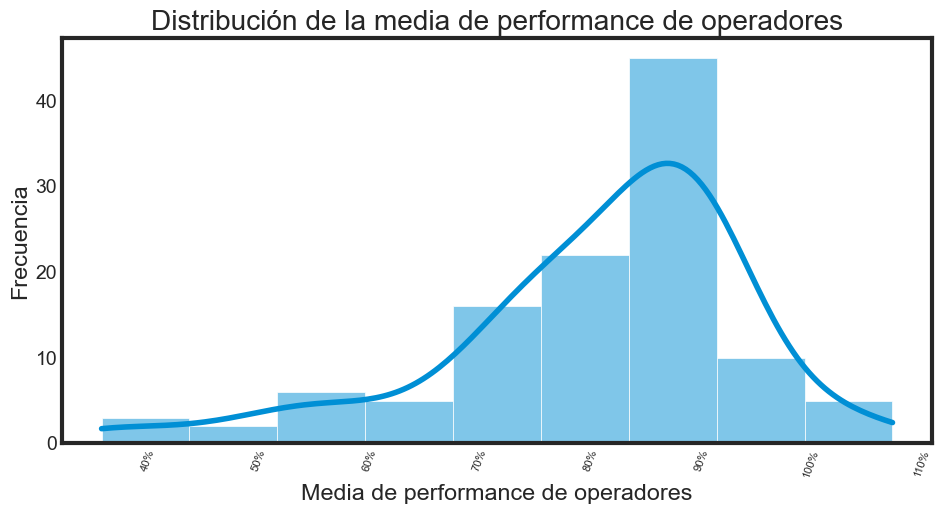

In [100]:
data = df_operators.sort_values(by='mean_performance')

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='mean_performance', bins=9, kde=True)
plt.xlabel('Media de performance de operadores')
plt.ylabel('Frecuencia')
plt.title('Distribución de la media de performance de operadores')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().xaxis.set_major_formatter(percentage_formatter)

plt.show()

Performance promedio operadores

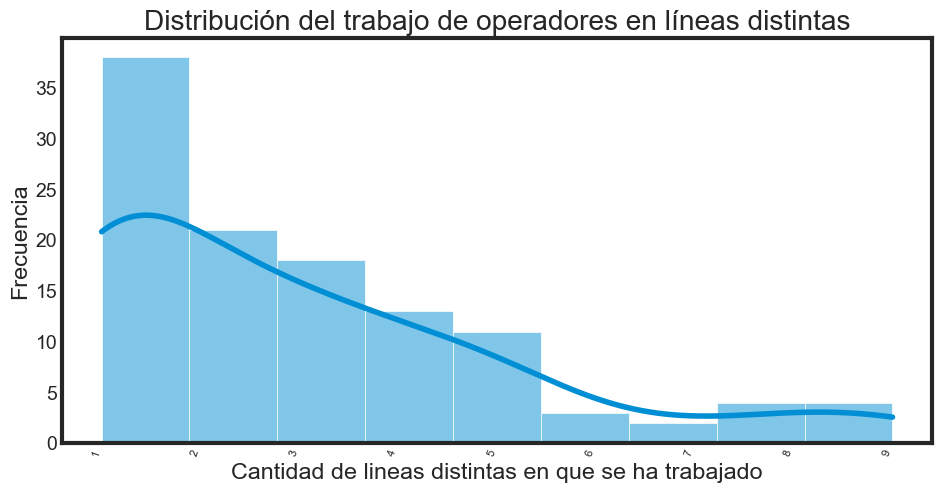

In [104]:
sns.set_style('white')
data = df_operators.sort_values(by='lines_qty')

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='lines_qty', bins=9, kde=True)

plt.xlabel('Cantidad de lineas distintas en que se ha trabajado')
plt.ylabel('Frecuencia')
plt.title('Distribución del trabajo de operadores en líneas distintas')
plt.xticks(rotation=70, ha='right', fontsize=8)

plt.show()

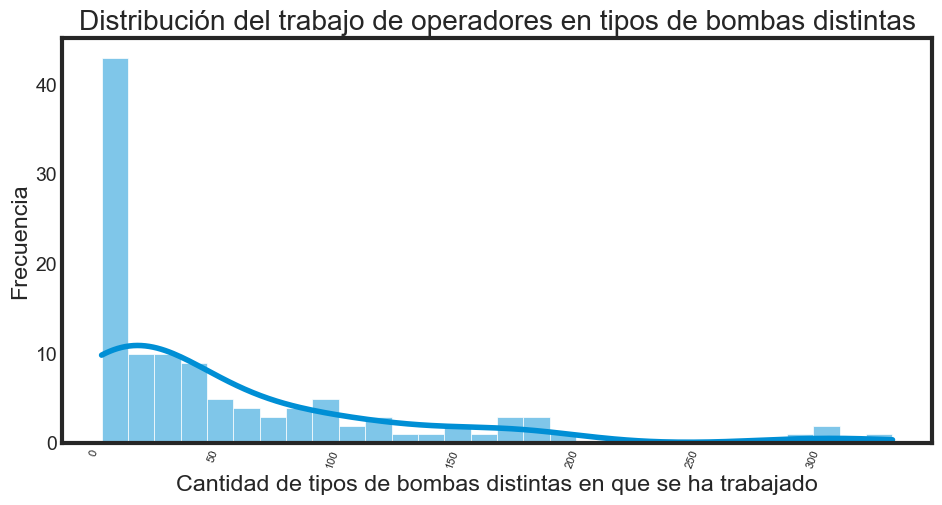

In [103]:
sns.set_style('white')
data = df_operators.sort_values(by='bomb_types_qty')

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='bomb_types_qty', bins=30, kde=True)

plt.xlabel('Cantidad de tipos de bombas distintas en que se ha trabajado')
plt.ylabel('Frecuencia')
plt.title('Distribución del trabajo de operadores en tipos de bombas distintas')
plt.xticks(rotation=70, ha='right', fontsize=8)

plt.show()

### Generación de dataframe operadores-OF-participación

In [52]:
operator_data = {}

for index, row in df_bombs.iterrows():
    order = row['order']
    operators = [op for op in row['operators_ids'].split(',') if op] 
    time_diff_minutes = row['time_diff_minutes_calculated']

    for operator in operators:
        if operator and (operator, order) not in operator_data:
            operator_data[(operator, order)] = 0
        operator_data[(operator, order)] += time_diff_minutes

new_df_data = []
for (operator, order), time in operator_data.items():
    new_df_data.append({'operator_id': operator, 'order': order, 'participation_minutes': time})

df_operators_participation = pd.DataFrame(new_df_data)
df_operators_participation.head()

operator_id    order  participation_minutes
0        5025  5160396             185.933283
1        5025  5165729             251.107000
2        5025  5169247             391.531283
3        5004  5169247             388.249950
4        5004  5171973              17.021267

In [53]:
df_of_index = df_of.set_index('order')

def get_info(row, col):
    return df_of_index.loc[row['order'], col]

def calculate_percentage(row):
    order = row['order']
    participation_minutes = row['participation_minutes']
    total_operators_minutes = df_of_index.loc[order, 'total_operators_minutes']
    return round((participation_minutes / total_operators_minutes) * 100, 1)

df_operators_participation['total_operators_minutes'] = df_operators_participation.apply(lambda row: get_info(row, 'total_operators_minutes'), axis=1)
df_operators_participation['participation_percentage'] = df_operators_participation.apply(calculate_percentage, axis=1)
df_operators_participation['of_performance'] = df_operators_participation.apply(lambda row: get_info(row, 'performance'), axis=1)
df_operators_participation['bomb_type'] = df_operators_participation.apply(lambda row: get_info(row, 'bomb_type'), axis=1)
df_operators_participation['line'] = df_operators_participation.apply(lambda row: get_info(row, 'line'), axis=1)
df_operators_participation['theorical_qty'] = df_operators_participation.apply(lambda row: get_info(row, 'theorical_qty'), axis=1)

df_operators_participation

operator_id    order  participation_minutes  total_operators_minutes  \
0            5025  5160396             185.933283               185.933283   
1            5025  5165729             251.107000               251.107000   
2            5025  5169247             391.531283               779.781233   
3            5004  5169247             388.249950               779.781233   
4            5004  5171973              17.021267               367.533717   
...           ...      ...                    ...                      ...   
19731        9351  5379549               7.913050                31.652200   
19732        8250  5379566              78.492333               313.969333   
19733        9109  5379566              78.492333               313.969333   
19734        9279  5379566              78.492333               313.969333   
19735        9351  5379566              78.492333               313.969333   

       participation_percentage  of_performance       bomb_type         line  \
0                         100.0        0.914306            1210      LÍNEA 1   
1                         100.0        0.681622      01224-0890      LÍNEA 1   
2                          50.2        0.923336            1197      LÍNEA 1   
3                          49.8        0.923336            1197      LÍNEA 1   
4                           4.6        0.870668      01205-0810      LÍNEA 1   
...                         ...             ...             ...          ...   
19731                      25.0        0.695054  DY300T-MDFM000  LINEA 8 IML   
19732                      25.0        1.051058     SE2N050M-HS  LINEA 8 IML   
19733                      25.0        1.051058     SE2N050M-HS  LINEA 8 IML   
19734                      25.0        1.051058     SE2N050M-HS  LINEA 8 IML   
19735                      25.0        1.051058     SE2N050M-HS  LINEA 8 IML   

       theorical_qty  
0           2.187450  
1           2.934179  
2           9.747265  
3           9.747265  
4           4.594171  
...              ...  
19731       2.877473  
19732      28.542667  
19733      28.542667  
19734      28.542667  
19735      28.542667  

[19736 rows x 9 columns]

In [54]:
df_operators_participation.groupby(['operator_id', 'line']).agg(orders_qty=('order', 'count'),).reset_index().sort_values(by='orders_qty', ascending=False)

operator_id         line  orders_qty
127        8615      LÍNEA 2        1150
231         918      LÍNEA 2        1130
113        8230      LÍNEA 2         890
258        9279  LINEA 8 IML         768
283        9351  LINEA 8 IML         737
..          ...          ...         ...
224        9147   LÍNEA KIVU           1
304        9379      LÍNEA 2           1
271        9324      LINEA 6           1
306        9380      LINEA 4           1
340        9994      LÍNEA 1           1

[341 rows x 3 columns]

In [55]:
df_grouped = df_operators_participation.groupby(['operator_id', 'line']).agg(orders_qty=('order', 'count'),).reset_index().groupby(['operator_id']).agg(lines_qty=('line', 'count'),).reset_index()
df_grouped[df_grouped.lines_qty > 1]

operator_id  lines_qty
2          1007          9
5           287          6
6            37          3
7           412          2
9          5004          6
..          ...        ...
107        9436          2
108        9443          3
110        9508          2
111        9511          2
113        9994          2

[76 rows x 2 columns]

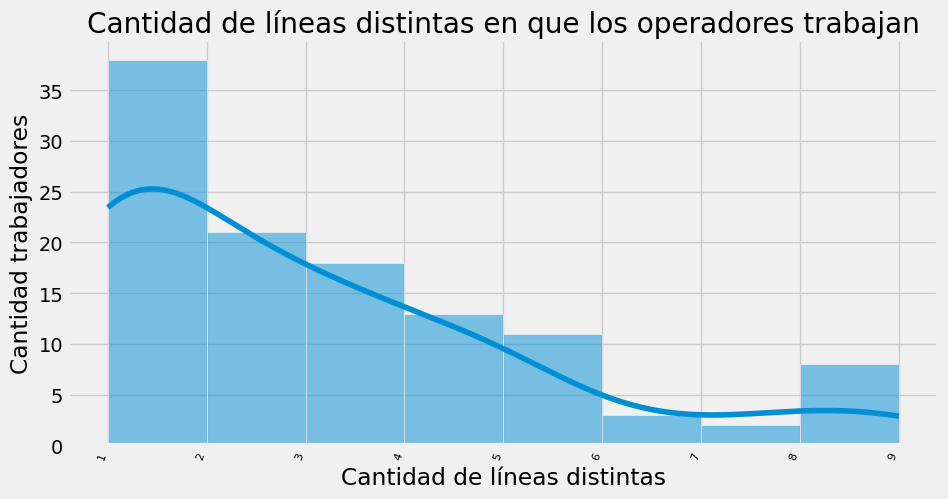

In [56]:
data = df_grouped.sort_values(by='lines_qty')

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='lines_qty', bins=8, kde=True)
plt.xlabel('Cantidad de líneas distintas')
plt.ylabel('Cantidad trabajadores')
plt.title('Cantidad de líneas distintas en que los operadores trabajan')
plt.xticks(rotation=70, ha='right', fontsize=8)

plt.show()

Cantidad de operadores según distintas líneas en las que han trabajado


In [57]:
df_grouped.groupby(['lines_qty']).agg(operators_qty=('operator_id', 'count'),).reset_index()

lines_qty  operators_qty
0          1             38
1          2             21
2          3             18
3          4             13
4          5             11
5          6              3
6          7              2
7          8              4
8          9              4

## Exploración patrones en performance

### ¿Cómo es la performance de los trabajadores de la fábrica?

In [58]:
df_operators.head()

id                                             of_ids  \
0   287  [274185, 5158184, 5161187, 5162031, 5162172, 5...   
1  8615  [274185, 5159134, 5161410, 5162172, 5163398, 5...   
2  9105  [274185, 5189522, 5210073, 5212904, 5213259, 5...   
3  8250  [274185, 5167564, 5174138, 5177030, 5178178, 5...   
4  9104  [274185, 5161410, 5201226, 5206185, 5212222, 5...   

                                     of_performances  of_qty  \
0  [0.0, 1.0138765323689471, 0.8528714857821097, ...     580   
1  [0.0, 0.7064084560253582, 1.1838276777960204, ...    1218   
2  [0.0, 0.6612374885761816, 1.0049209922924365, ...     143   
3  [0.0, 0.9201413514952291, 0.930609219994463, 0...     147   
4  [0.0, 1.1838276777960204, 0.7990761731314033, ...     668   

   mean_performance  std_performance  min_performance  max_performance  
0          0.896693         0.149603              0.0         1.191297  
1          0.898075         0.140513              0.0         1.186424  
2          0.885859         0.159236              0.0         1.149069  
3          0.830937         0.218657              0.0         1.194739  
4          0.874439         0.160751              0.0         1.197646

#### Definición de segmentos

In [59]:
df_op_1 = df_operators[(df_operators.mean_performance > 1.0)]
df_op_2 = df_operators[(df_operators.mean_performance > .9) & (df_operators.mean_performance <= 1.0)]
df_op_3 = df_operators[(df_operators.mean_performance > .8) & (df_operators.mean_performance <= .9)]
df_op_4 = df_operators[(df_operators.mean_performance > .7) & (df_operators.mean_performance <= .8)]
df_op_5 = df_operators[(df_operators.mean_performance > .6) & (df_operators.mean_performance <= .7)]
df_op_6 = df_operators[(df_operators.mean_performance > .5) & (df_operators.mean_performance <= .6)]
df_op_7 = df_operators[(df_operators.mean_performance <= .5)]

In [60]:
operators_seg_dict = {
'[> 100%]': df_op_1,
'[90% - 100%]': df_op_2,
'[80% - 90%]': df_op_3,
'[70% - 80%]': df_op_4,
'[60% - 70%]': df_op_5,  
'[50% - 60%]': df_op_6,
'[< 50%]': df_op_7    
}

In [61]:
print(f'''
  Rendimientos promedios de operadores:
  
  [> 100%] --> {df_op_1.shape[0]} | {round(df_op_1.shape[0]/df_operators.shape[0]*100, 2)}% 
  [90% - 100%] --> {df_op_2.shape[0]} | {round(df_op_2.shape[0]/df_operators.shape[0]*100, 2)}% 
  [80% - 90%] --> {df_op_3.shape[0]} | {round(df_op_3.shape[0]/df_operators.shape[0]*100, 2)}% 
  [70% - 80%] --> {df_op_4.shape[0]} | {round(df_op_4.shape[0]/df_operators.shape[0]*100, 2)}% 
  [60% - 70%] --> {df_op_5.shape[0]} | {round(df_op_5.shape[0]/df_operators.shape[0]*100, 2)}% 
  [50% - 60%] --> {df_op_6.shape[0]} | {round(df_op_6.shape[0]/df_operators.shape[0]*100, 2)}% 
  [< 50%] --> {df_op_7.shape[0]} | {round(df_op_7.shape[0]/df_operators.shape[0]*100, 2)}% 
''')


  Rendimientos promedios de operadores:
  
  [> 100%] --> 3 | 2.63% 
  [90% - 100%] --> 17 | 14.91% 
  [80% - 90%] --> 48 | 42.11% 
  [70% - 80%] --> 26 | 22.81% 
  [60% - 70%] --> 8 | 7.02% 
  [50% - 60%] --> 7 | 6.14% 
  [< 50%] --> 5 | 4.39% 



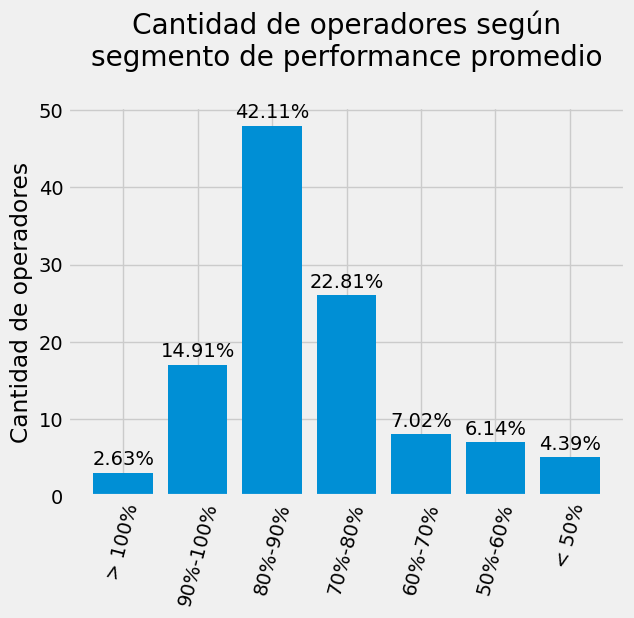

In [62]:
labels = ['> 100%', '90%-100%', '80%-90%', '70%-80%', '60%-70%', '50%-60%', '< 50%']
values = [3, 17, 48, 26, 8, 7, 5]
percentages = [2.63, 14.91, 42.11, 22.81, 7.02, 6.14, 4.39]

# Crear el gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(labels, values)

# Agregar porcentajes sobre las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Configurar etiquetas y título
ax.set_ylabel('Cantidad de operadores')
ax.set_title('Cantidad de operadores según\nsegmento de performance promedio', pad=30)
plt.xticks(rotation=75)

# Mostrar el gráfico
plt.show()

### Evaluación de cada segmento

In [63]:
print(f'''
Promedio de porcentaje de participación (sobre total de la OF) y cantidad promedio de OFs trabajadas según cada segmento:
[> 100%] --> {round(df_operators_participation[df_operators_participation.operator_id.isin(df_op_1.id.unique())].participation_percentage.mean(), 2)}% | {round(df_op_1.of_qty.mean(), 1)}
[90% - 100%] --> {round(df_operators_participation[df_operators_participation.operator_id.isin(df_op_2.id.unique())].participation_percentage.mean(), 2)}% | {round(df_op_2.of_qty.mean(), 1)} 
[80% - 90%] --> {round(df_operators_participation[df_operators_participation.operator_id.isin(df_op_3.id.unique())].participation_percentage.mean(), 2)}% | {round(df_op_3.of_qty.mean(), 1)} 
[70% - 80%] --> {round(df_operators_participation[df_operators_participation.operator_id.isin(df_op_4.id.unique())].participation_percentage.mean(), 2)}% | {round(df_op_4.of_qty.mean(), 1)}  
[60% - 70%] --> {round(df_operators_participation[df_operators_participation.operator_id.isin(df_op_5.id.unique())].participation_percentage.mean(), 2)}% | {round(df_op_5.of_qty.mean(), 1)} 
[50% - 60%] --> {round(df_operators_participation[df_operators_participation.operator_id.isin(df_op_6.id.unique())].participation_percentage.mean(), 2)}% | {round(df_op_6.of_qty.mean(), 1)}  
[< 50%] --> {round(df_operators_participation[df_operators_participation.operator_id.isin(df_op_7.id.unique())].participation_percentage.mean(), 2)}% | {round(df_op_7.of_qty.mean(), 1)}       
''')


Promedio de porcentaje de participación (sobre total de la OF) y cantidad promedio de OFs trabajadas según cada segmento:
[> 100%] --> 3.94% | 2.7
[90% - 100%] --> 28.36% | 189.1 
[80% - 90%] --> 24.93% | 227.5 
[70% - 80%] --> 31.33% | 92.0  
[60% - 70%] --> 23.65% | 214.2 
[50% - 60%] --> 20.63% | 208.1  
[< 50%] --> 16.97% | 6.0       



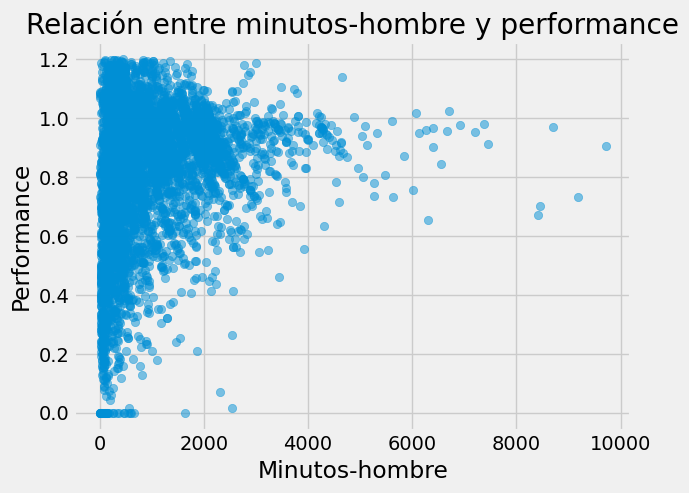

In [64]:
data = df_of[df_of.total_operators_minutes < 12000] # quitar outlier de 17392 minutos-hombre
plt.scatter(data['total_operators_minutes'], data['performance'], alpha=0.5)
plt.title('Relación entre minutos-hombre y performance')
plt.xlabel('Minutos-hombre')
plt.ylabel('Performance')
plt.show()

#### Participación por línea según cada segmento

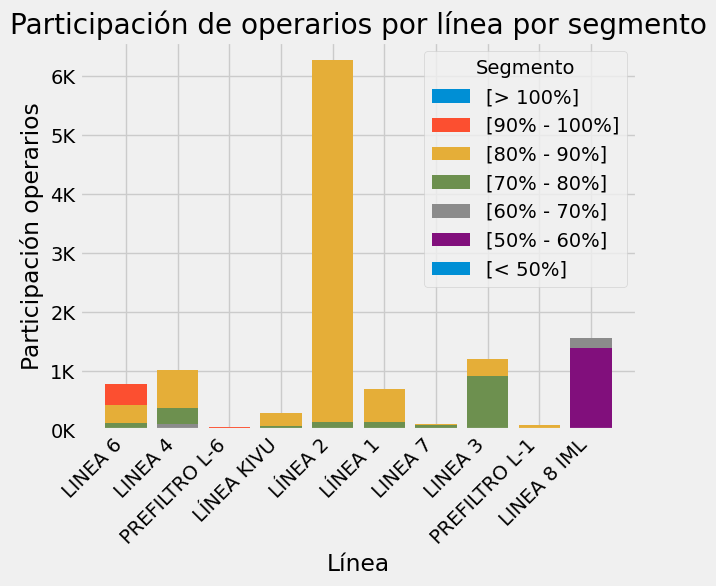

In [65]:
for seg, df_op in operators_seg_dict.items():
    data = df_operators_participation[df_operators_participation.operator_id.isin(df_op.id.unique())]
    data = data.groupby(['line'])['order'].size().reset_index(name='count').sort_values(by='line', ascending=False)
    plt.bar(data['line'], data['count'], label=str(seg))

plt.xlabel('Línea')
plt.ylabel('Participación operarios')
plt.title('Participación de operarios por línea por segmento')

# Aplicar el formateador al eje y
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Segmento')
plt.xticks(rotation=45, ha='right')
plt.show()

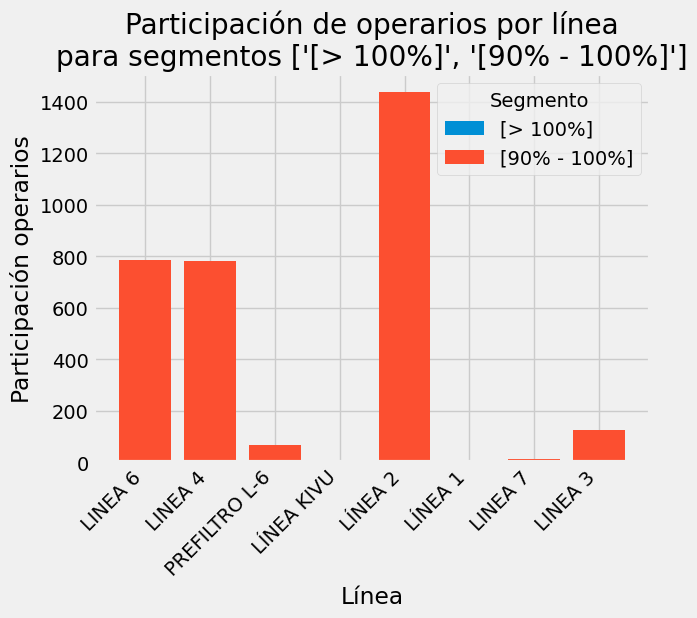

In [66]:
segments_list= ['[> 100%]', '[90% - 100%]']
for seg, df_op in {key: value for key, value in operators_seg_dict.items() if key in segments_list}.items():
    data = df_operators_participation[df_operators_participation.operator_id.isin(df_op.id.unique())]
    data = data.groupby(['line'])['order'].size().reset_index(name='count').sort_values(by='line', ascending=False)
    plt.bar(data['line'], data['count'], label=str(seg))

plt.xlabel('Línea')
plt.ylabel('Participación operarios')
plt.title(f'Participación de operarios por línea\npara segmentos {segments_list}')

plt.legend(title='Segmento')
plt.xticks(rotation=45, ha='right')
plt.show()

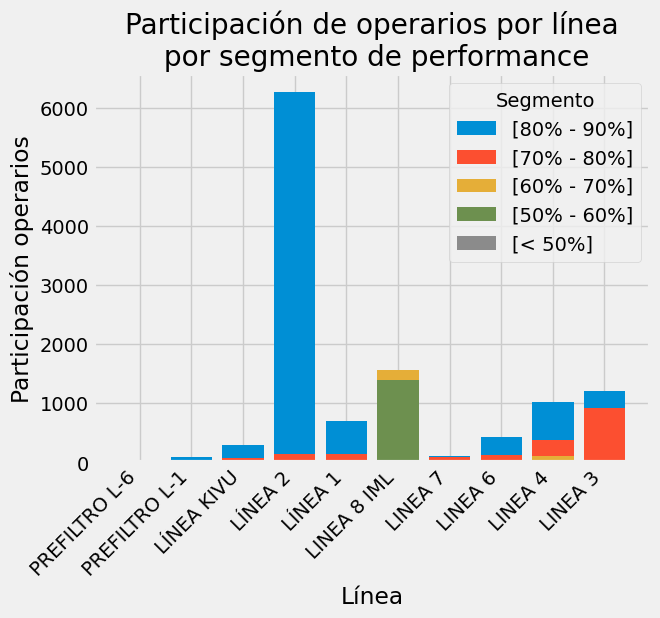

In [67]:
segments_list= ['[80% - 90%]', '[70% - 80%]', '[60% - 70%]', '[50% - 60%]', '[< 50%]']
for seg, df_op in {key: value for key, value in operators_seg_dict.items() if key in segments_list}.items():
    data = df_operators_participation[df_operators_participation.operator_id.isin(df_op.id.unique())]
    data = data.groupby(['line'])['order'].size().reset_index(name='count').sort_values(by='line', ascending=False)
    plt.bar(data['line'], data['count'], label=str(seg))

plt.xlabel('Línea')
plt.ylabel('Participación operarios')
plt.title('Participación de operarios por línea\n por segmento de performance')

plt.legend(title='Segmento')
plt.xticks(rotation=45, ha='right')
plt.show()

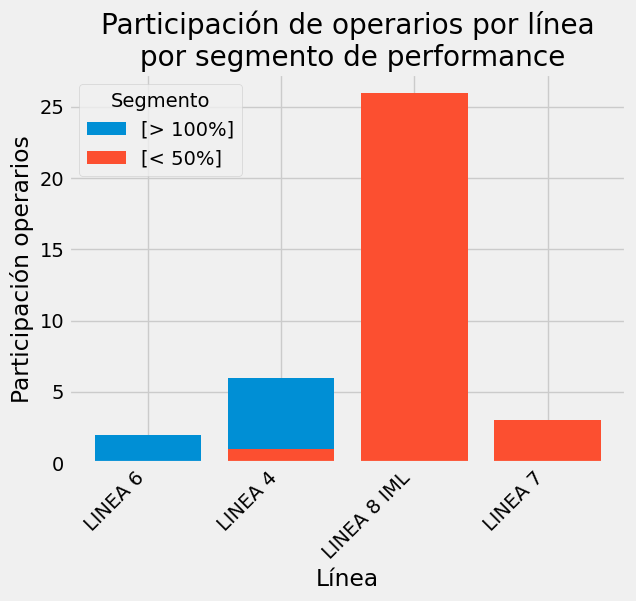

In [68]:
segments_list= ['[> 100%]', '[< 50%]']
for seg, df_op in {key: value for key, value in operators_seg_dict.items() if key in segments_list}.items():
    data = df_operators_participation[df_operators_participation.operator_id.isin(df_op.id.unique())]
    data = data.groupby(['line'])['order'].size().reset_index(name='count').sort_values(by='line', ascending=False)
    plt.bar(data['line'], data['count'], label=str(seg))

plt.xlabel('Línea')
plt.ylabel('Participación operarios')
plt.title('Participación de operarios por línea\n por segmento de performance')

plt.legend(title='Segmento')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Detalle por segmento

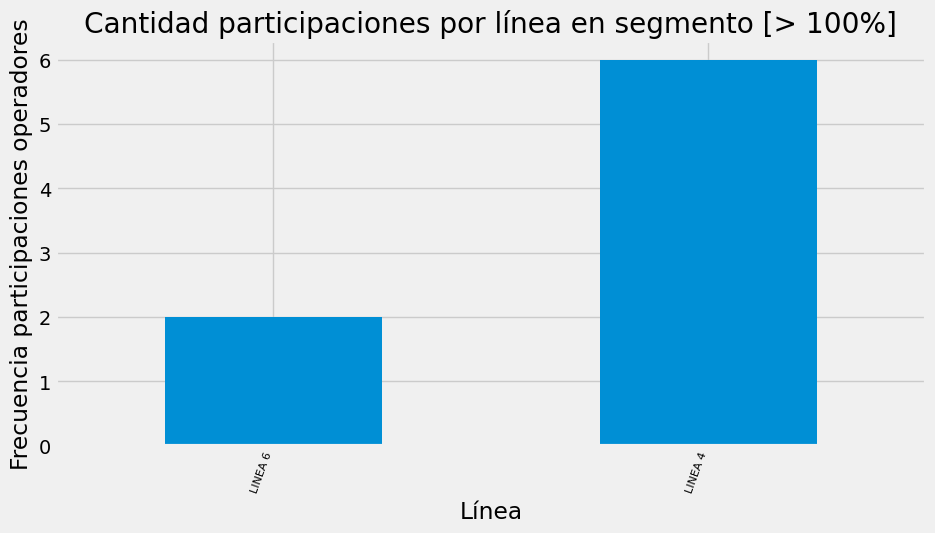

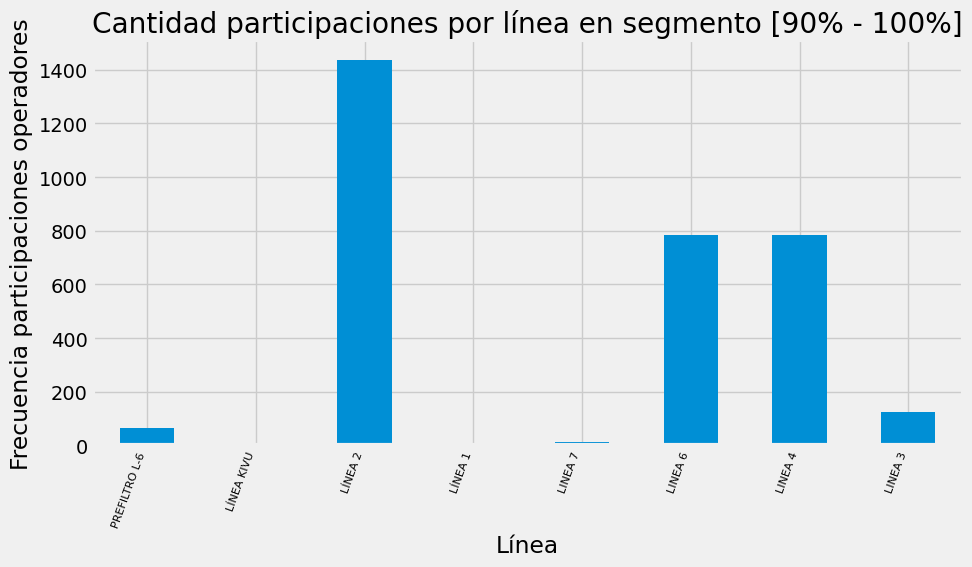

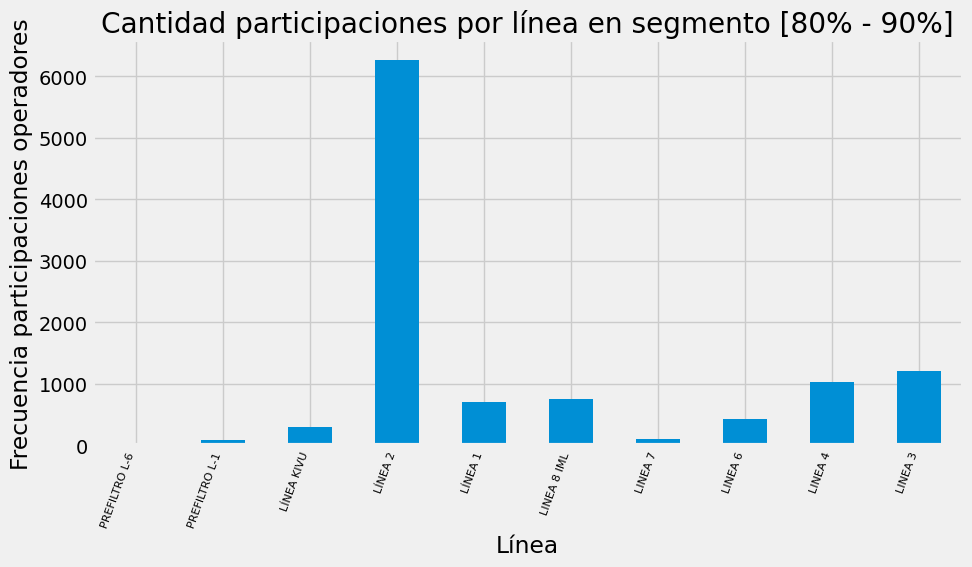

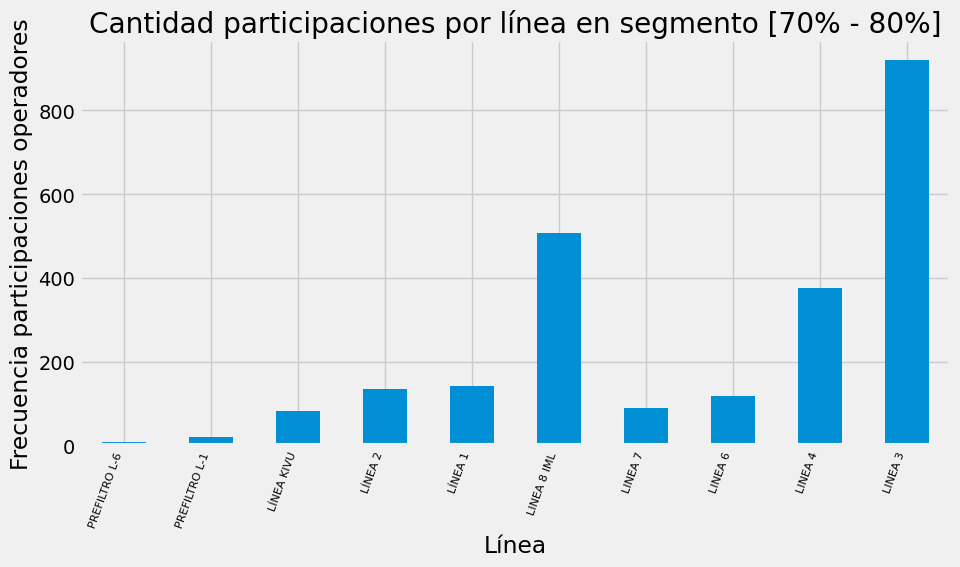

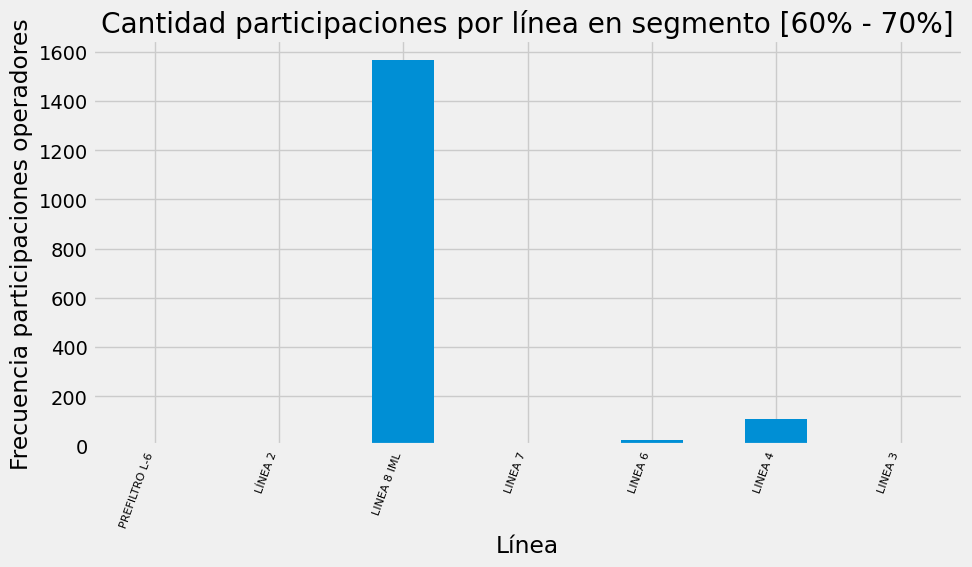

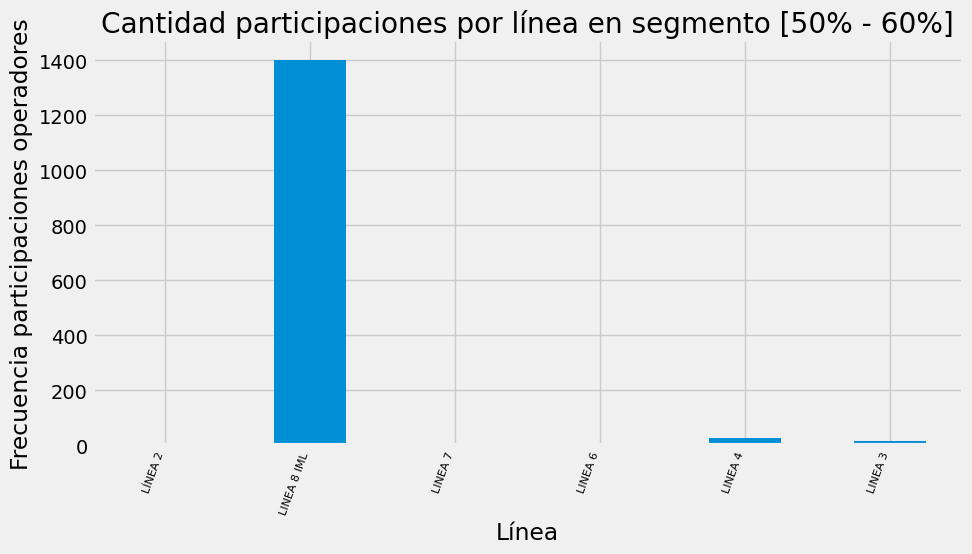

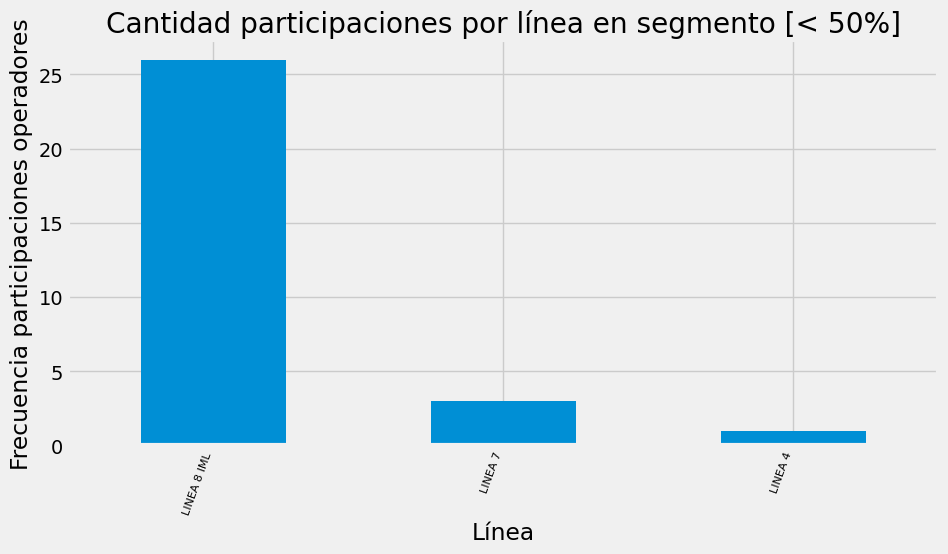

In [69]:
for seg, df_op in operators_seg_dict.items():
    data = df_operators_participation[df_operators_participation.operator_id.isin(df_op.id.unique())]
    data = data.groupby(['line'])['order'].size().reset_index(name='count').sort_values(by='line', ascending=False)
    data.plot(kind='bar', x='line', figsize=(10, 5))
    plt.xlabel('Línea')
    plt.ylabel('Frecuencia participaciones operadores')
    plt.title(f'Cantidad participaciones por línea en segmento {seg}')
    plt.xticks(rotation=70, ha='right', fontsize=8)
    plt.gca().legend().set_visible(False)
    plt.show()



#### Participación por rangos sobre el tiempo de participación en el tiempo total de las OFs

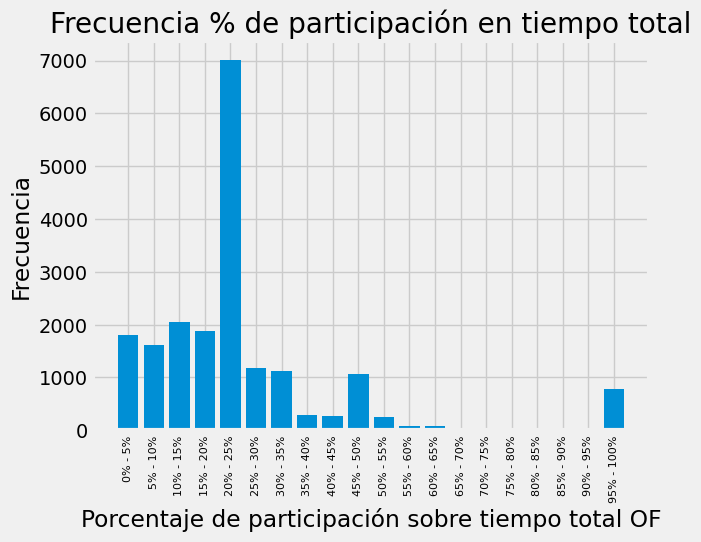

In [70]:
data = df_operators_participation
data['participation_category'] = pd.cut(data['participation_percentage'], 
                                        bins=range(0, 105, 5),
                                        labels=[f'{i}% - {i+5}%' for i in range(0, 100, 5)]).fillna('0% - 5%')
data = data.groupby(['participation_category'])['order'].size().reset_index(name='count').sort_values(by='participation_category', ascending=True)
plt.bar(data['participation_category'], data['count'])

plt.xlabel('Porcentaje de participación sobre tiempo total OF')
plt.ylabel('Frecuencia')
plt.title('Frecuencia % de participación en tiempo total')

plt.xticks(rotation=90, fontsize=8, ha='center')
plt.show()

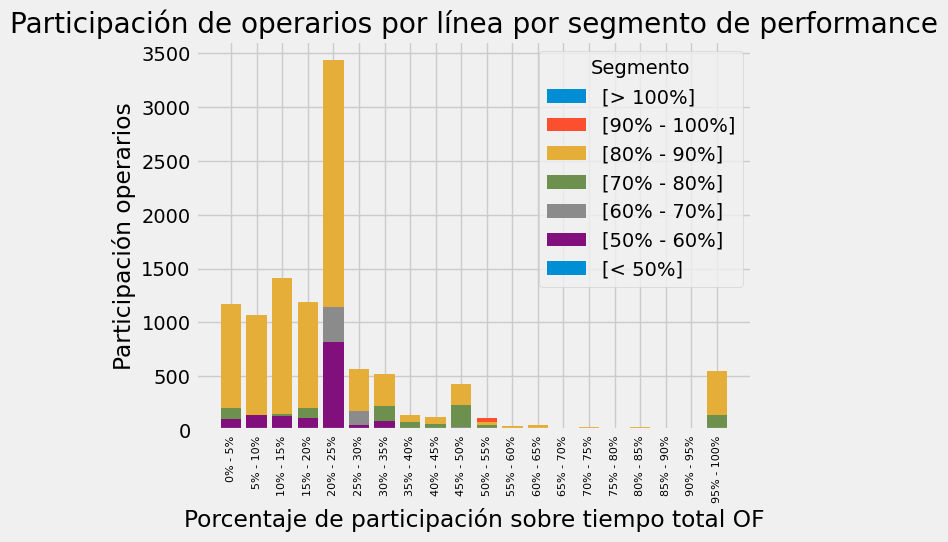

In [71]:
segments_list= ['[80% - 90%]', '[70% - 80%]', '[60% - 70%]', '[50% - 60%]', '[< 50%]']
segments_list= operators_seg_dict.keys()
data = df_operators_participation
data['participation_category'] = pd.cut(data['participation_percentage'], 
                                        bins=range(0, 105, 5),
                                        labels=[f'{i}% - {i+5}%' for i in range(0, 100, 5)]).fillna('0% - 5%')
for seg, df_op in {key: value for key, value in operators_seg_dict.items() if key in segments_list}.items():
    data_aux = df_operators_participation[df_operators_participation.operator_id.isin(df_op.id.unique())]
    data_aux = data_aux.groupby(['participation_category'])['order'].size().reset_index(name='count').sort_values(by='participation_category', ascending=True)
    plt.bar(data_aux['participation_category'], data_aux['count'], label=str(seg))

plt.xlabel('Porcentaje de participación sobre tiempo total OF')
plt.ylabel('Participación operarios')
plt.title('Participación de operarios por línea por segmento de performance')

plt.legend(title='Segmento')
plt.xticks(rotation=90, fontsize=8, ha='center')
plt.show()

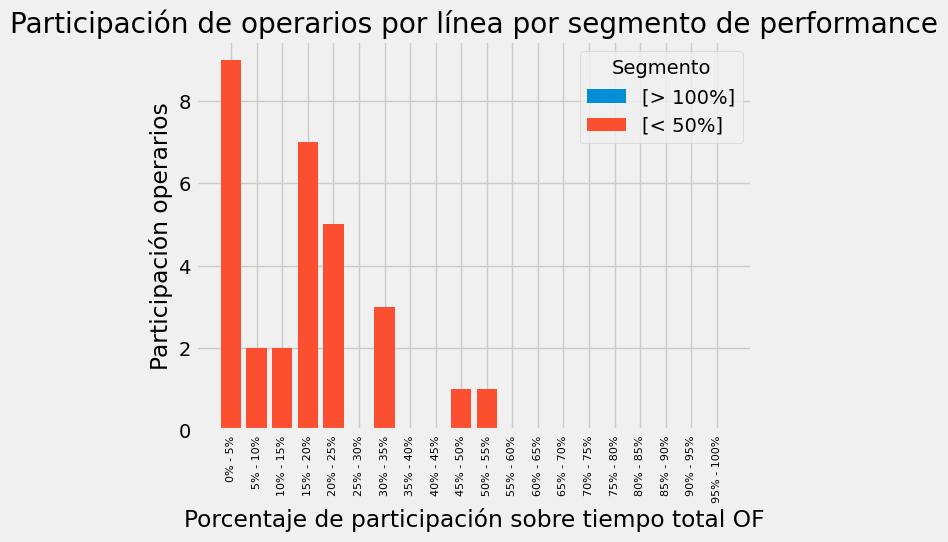

In [72]:
segments_list= ['[< 50%]', '[> 100%]']
data = df_operators_participation
data['participation_category'] = pd.cut(data['participation_percentage'], 
                                        bins=range(0, 105, 5),
                                        labels=[f'{i}% - {i+5}%' for i in range(0, 100, 5)]).fillna('0% - 5%')
for seg, df_op in {key: value for key, value in operators_seg_dict.items() if key in segments_list}.items():
    data_aux = data[data.operator_id.isin(df_op.id.unique())]
    data_aux = data_aux.groupby(['participation_category'])['order'].size().reset_index(name='count').sort_values(by='participation_category', ascending=True)
    plt.bar(data_aux['participation_category'], data_aux['count'], label=str(seg))

plt.xlabel('Porcentaje de participación sobre tiempo total OF')
plt.ylabel('Participación operarios')
plt.title('Participación de operarios por línea por segmento de performance')

plt.legend(title='Segmento')
plt.xticks(rotation=90, fontsize=8, ha='center')
plt.show()

In [73]:
data = df_operators_participation
data['performance_category'] = pd.cut(data['of_performance']*100, 
                                        bins=range(0, 120, 10),
                                        labels=[f'{i}% - {i+10}%' for i in range(0, 110, 10)]).fillna('0% - 10%')

In [74]:
df_operators_participation.head()

operator_id    order  participation_minutes  total_operators_minutes  \
0        5025  5160396             185.933283               185.933283   
1        5025  5165729             251.107000               251.107000   
2        5025  5169247             391.531283               779.781233   
3        5004  5169247             388.249950               779.781233   
4        5004  5171973              17.021267               367.533717   

   participation_percentage  of_performance   bomb_type     line  \
0                     100.0        0.914306        1210  LÍNEA 1   
1                     100.0        0.681622  01224-0890  LÍNEA 1   
2                      50.2        0.923336        1197  LÍNEA 1   
3                      49.8        0.923336        1197  LÍNEA 1   
4                       4.6        0.870668  01205-0810  LÍNEA 1   

   theorical_qty participation_category performance_category  
0       2.187450             95% - 100%           90% - 100%  
1       2.934179             95% - 100%            60% - 70%  
2       9.747265              50% - 55%           90% - 100%  
3       9.747265              45% - 50%           90% - 100%  
4       4.594171                0% - 5%            80% - 90%

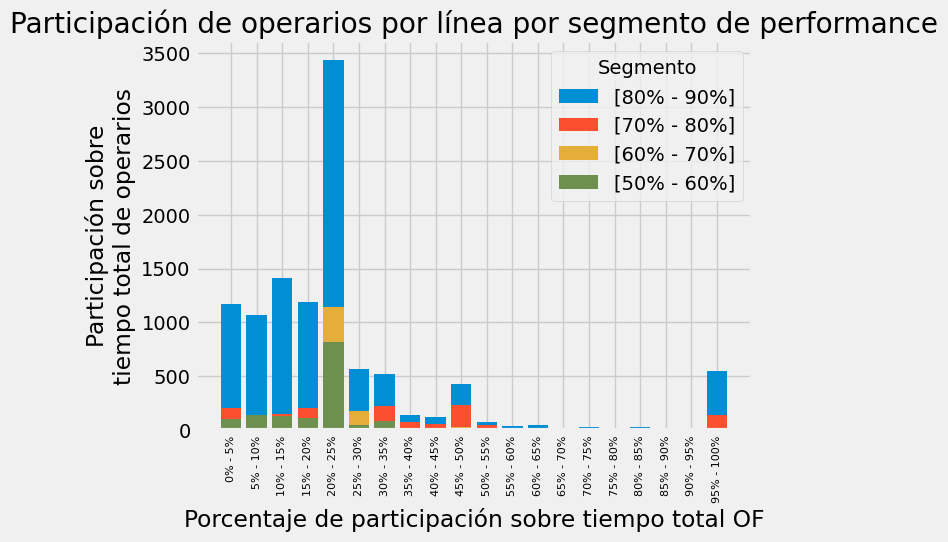

In [75]:
segments_list= ['[80% - 90%]', '[70% - 80%]', '[60% - 70%]', '[50% - 60%]']
data = df_operators_participation
data['participation_category'] = pd.cut(data['participation_percentage'], 
                                        bins=range(0, 105, 5),
                                        labels=[f'{i}% - {i+5}%' for i in range(0, 100, 5)]).fillna('0% - 5%')
for seg, df_op in {key: value for key, value in operators_seg_dict.items() if key in segments_list}.items():
    data_aux = data[data.operator_id.isin(df_op.id.unique())]
    data_aux = data_aux.groupby(['participation_category'])['order'].size().reset_index(name='count').sort_values(by='participation_category', ascending=True)
    plt.bar(data_aux['participation_category'], data_aux['count'], label=str(seg))

plt.xlabel('Porcentaje de participación sobre tiempo total OF')
plt.ylabel('Participación sobre\ntiempo total de operarios')
plt.title('Participación de operarios por línea por segmento de performance')

plt.legend(title='Segmento')
plt.xticks(rotation=90, fontsize=8, ha='center')
plt.show()

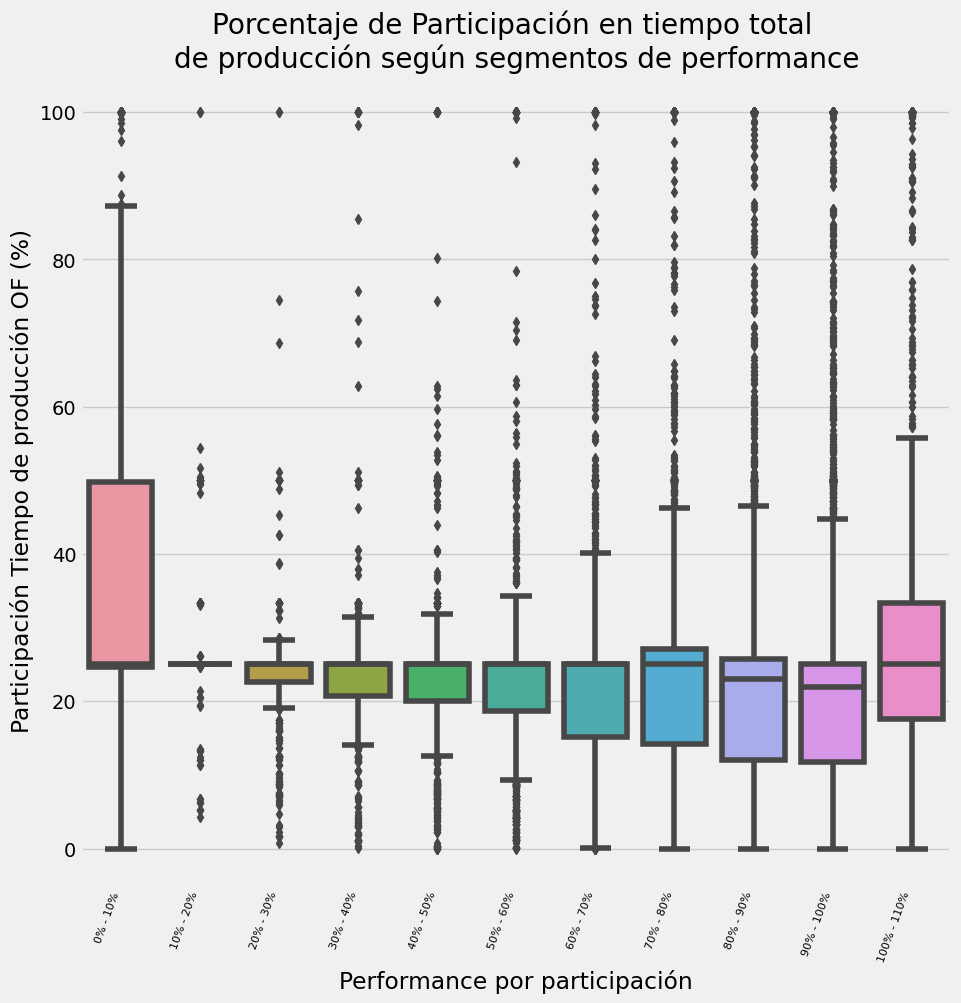

In [76]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_operators_participation, x='performance_category', y='participation_percentage')
plt.xlabel('Performance por participación')
plt.ylabel('Participación Tiempo de producción OF (%)')
plt.title('Porcentaje de Participación en tiempo total \nde producción según segmentos de performance')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.show()

#### Cantidad de operadores por OF según segmento de performance

In [77]:
df_of['performance_category'] = pd.cut(df_of['performance']*100, 
                                        bins=range(0, 120, 10),
                                        labels=[f'{i}% - {i+10}%' for i in range(0, 110, 10)]).fillna('0% - 10%')
df_of.head()

order   bomb_type     line  plan_qty  total_good_qty  total_bad_qty  \
0   274185     HPS050M  LÍNEA 2       1.0             0.0            0.0   
1  5029646       25461  LINEA 4       1.0            17.0            0.0   
2  5070828       11509  LINEA 6      12.0             0.0            0.0   
4  5157110  01226-0890  LÍNEA 1       2.0             2.0            0.0   
5  5158184    11509INT  LINEA 6      12.0            12.0            0.0   

   good_qty  bad_qty              start_date                end_date  \
0       0.0      0.0 2020-02-28 07:47:47.760 2021-02-18 08:44:11.897   
1       0.0      0.0 2020-05-26 10:42:49.543 2021-04-07 05:41:01.177   
2       0.0      0.0 2020-04-17 05:47:54.977 2022-08-10 06:10:35.247   
4       2.0      0.0 2020-01-27 12:04:52.480 2020-01-28 07:26:01.683   
5      12.0      0.0 2020-01-18 11:48:44.873 2020-01-18 12:46:26.833   

   theorical_diff  theorical_time  time_diff_seconds_calculated  \
0           13189           13.35                     13189.211   
1             120            8.80                       118.318   
2           32671           17.40                     32671.480   
4           12623           85.58                     12622.856   
5            3462           19.50                      3461.960   

   time_diff_minutes_calculated  total_operators_minutes  \
0                    219.820183               590.426267   
1                      1.971967                 3.112383   
2                    544.524667               594.821567   
4                    210.380933               210.380933   
5                     57.699333               230.797333   

                              operators_distinct_ids  registers_qty  \
0  [287, 8615, 9105, 8250, 9104, 8860, 8177, 8164...             10   
1                     [5020, 8822, 8860, 9120, 8866]              4   
2                                 [5033, 9436, 9142]              8   
4                                             [5025]              8   
5                             [287, 8945, 504, 1007]              2   

   operators_distinct_qty  theorical_qty  theorical_qty_round  performance  \
0                      11      44.226687                 44.0     0.000000   
1                       5       0.353680                  0.0     0.000000   
2                       3      34.185148                 34.0     0.000000   
4                       1       2.458296                  2.0     0.813572   
5                       4      11.835761                 12.0     1.013877   

   performance_round  time_diff_hours_calculated performance_category  
0                0.0                    3.663670             0% - 10%  
1                NaN                    0.032866             0% - 10%  
2                0.0                    9.075411             0% - 10%  
4                1.0                    3.506349            80% - 90%  
5                1.0                    0.961656          100% - 110%

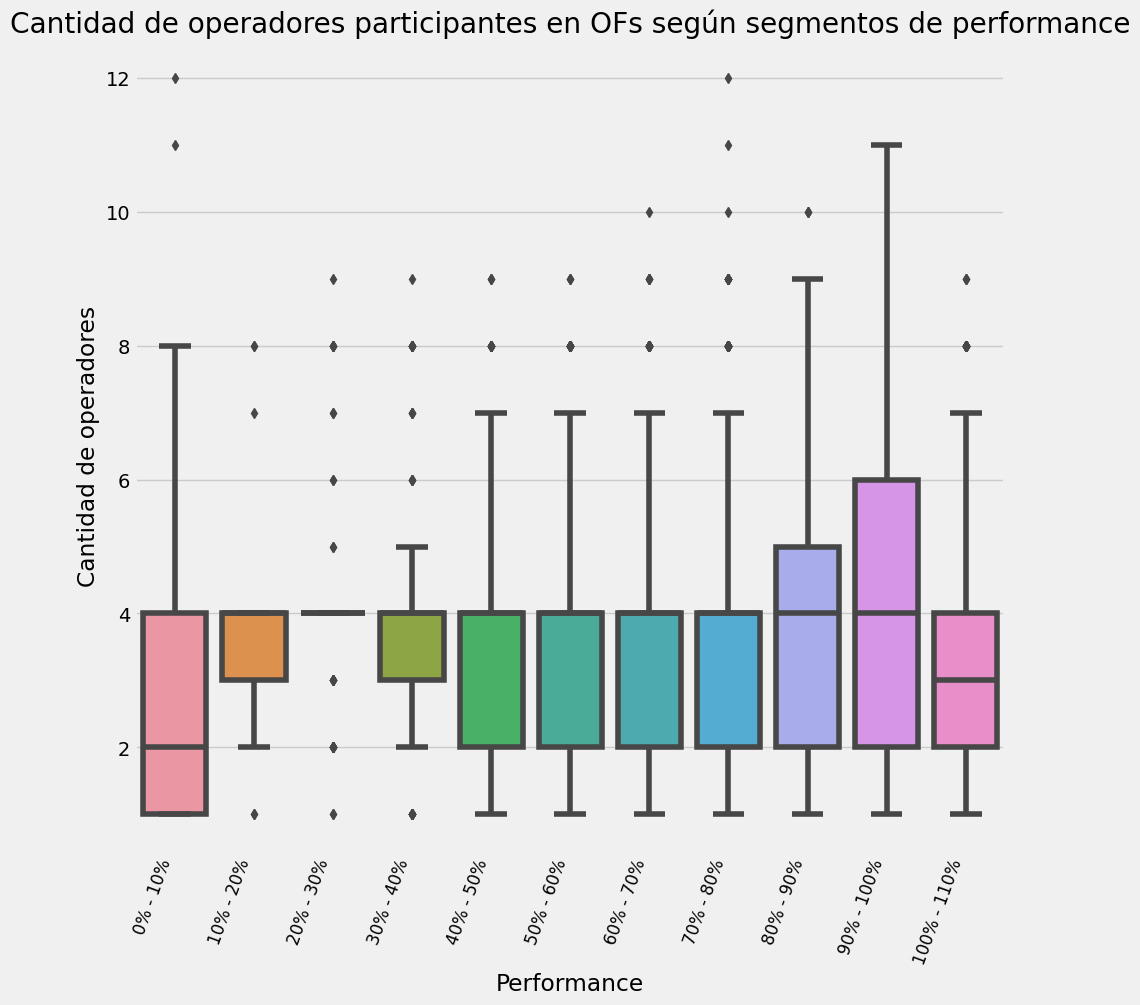

In [78]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_of, x='performance_category', y='operators_distinct_qty')
plt.xlabel('Performance')
plt.ylabel('Cantidad de operadores')
plt.title('Cantidad de operadores participantes en OFs según segmentos de performance')
plt.xticks(rotation=70, ha='right', fontsize=12)
plt.show()

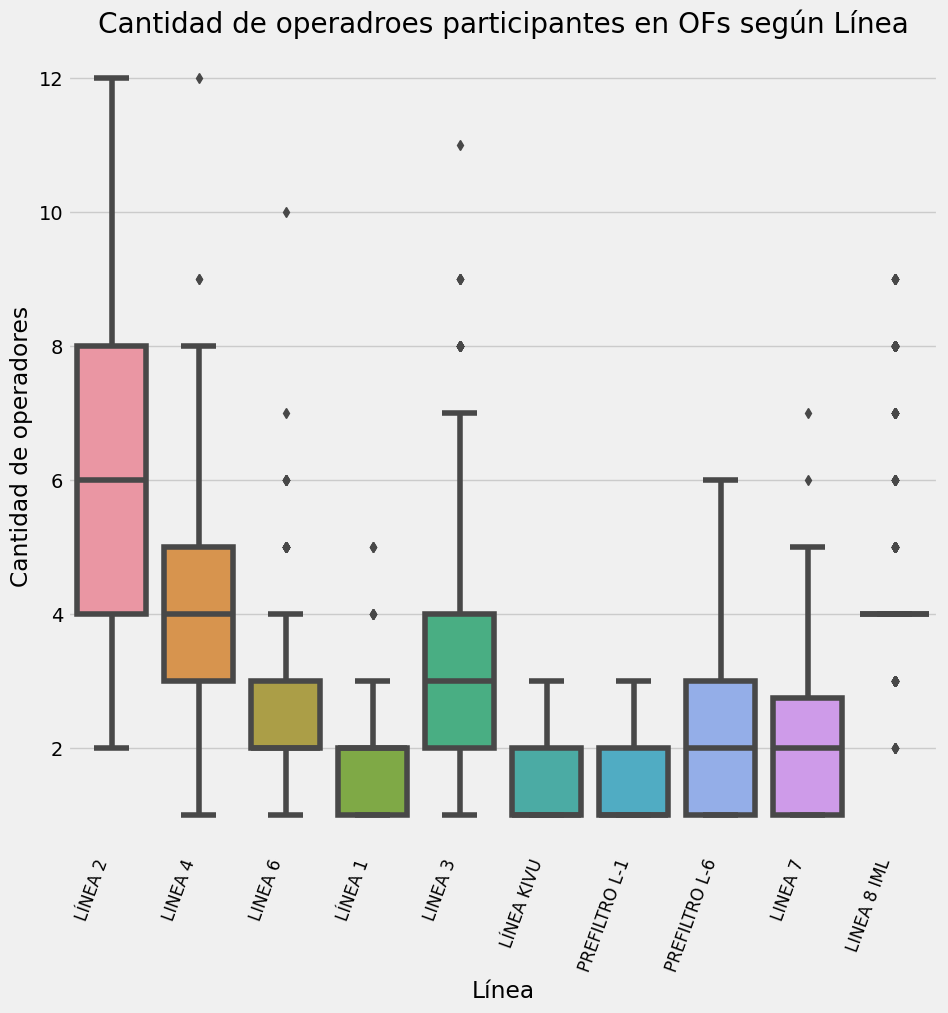

In [79]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_of, x='line', y='operators_distinct_qty')
plt.xlabel('Línea')
plt.ylabel('Cantidad de operadores')
plt.title('Cantidad de operadroes participantes en OFs según Línea')
plt.xticks(rotation=70, ha='right', fontsize=12)
plt.show()

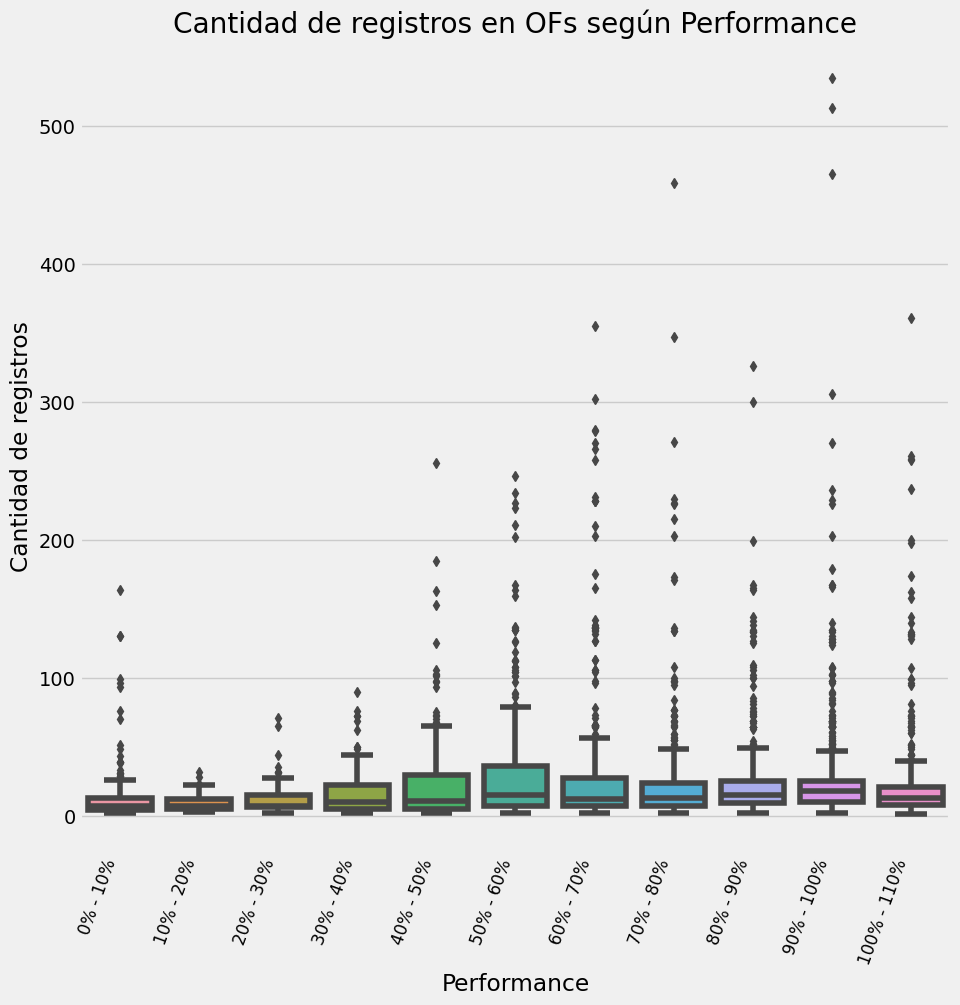

In [80]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_of[df_of.registers_qty < 600], x='performance_category', y='registers_qty')
plt.xlabel('Performance')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros en OFs según Performance')
plt.xticks(rotation=70, ha='right', fontsize=12)
plt.show()

In [81]:
FEATURES = ['good_qty', 'bad_qty', 'time_diff_seconds_calculated', 'time_diff_minutes_calculated',
            'total_operators_minutes', 'registers_qty', 'operators_distinct_qty', 'theorical_qty',
            'performance', 'line', 'bomb_type'
]

In [82]:
df_of.head()

order   bomb_type     line  plan_qty  total_good_qty  total_bad_qty  \
0   274185     HPS050M  LÍNEA 2       1.0             0.0            0.0   
1  5029646       25461  LINEA 4       1.0            17.0            0.0   
2  5070828       11509  LINEA 6      12.0             0.0            0.0   
4  5157110  01226-0890  LÍNEA 1       2.0             2.0            0.0   
5  5158184    11509INT  LINEA 6      12.0            12.0            0.0   

   good_qty  bad_qty              start_date                end_date  \
0       0.0      0.0 2020-02-28 07:47:47.760 2021-02-18 08:44:11.897   
1       0.0      0.0 2020-05-26 10:42:49.543 2021-04-07 05:41:01.177   
2       0.0      0.0 2020-04-17 05:47:54.977 2022-08-10 06:10:35.247   
4       2.0      0.0 2020-01-27 12:04:52.480 2020-01-28 07:26:01.683   
5      12.0      0.0 2020-01-18 11:48:44.873 2020-01-18 12:46:26.833   

   theorical_diff  theorical_time  time_diff_seconds_calculated  \
0           13189           13.35                     13189.211   
1             120            8.80                       118.318   
2           32671           17.40                     32671.480   
4           12623           85.58                     12622.856   
5            3462           19.50                      3461.960   

   time_diff_minutes_calculated  total_operators_minutes  \
0                    219.820183               590.426267   
1                      1.971967                 3.112383   
2                    544.524667               594.821567   
4                    210.380933               210.380933   
5                     57.699333               230.797333   

                              operators_distinct_ids  registers_qty  \
0  [287, 8615, 9105, 8250, 9104, 8860, 8177, 8164...             10   
1                     [5020, 8822, 8860, 9120, 8866]              4   
2                                 [5033, 9436, 9142]              8   
4                                             [5025]              8   
5                             [287, 8945, 504, 1007]              2   

   operators_distinct_qty  theorical_qty  theorical_qty_round  performance  \
0                      11      44.226687                 44.0     0.000000   
1                       5       0.353680                  0.0     0.000000   
2                       3      34.185148                 34.0     0.000000   
4                       1       2.458296                  2.0     0.813572   
5                       4      11.835761                 12.0     1.013877   

   performance_round  time_diff_hours_calculated performance_category  
0                0.0                    3.663670             0% - 10%  
1                NaN                    0.032866             0% - 10%  
2                0.0                    9.075411             0% - 10%  
4                1.0                    3.506349            80% - 90%  
5                1.0                    0.961656          100% - 110%

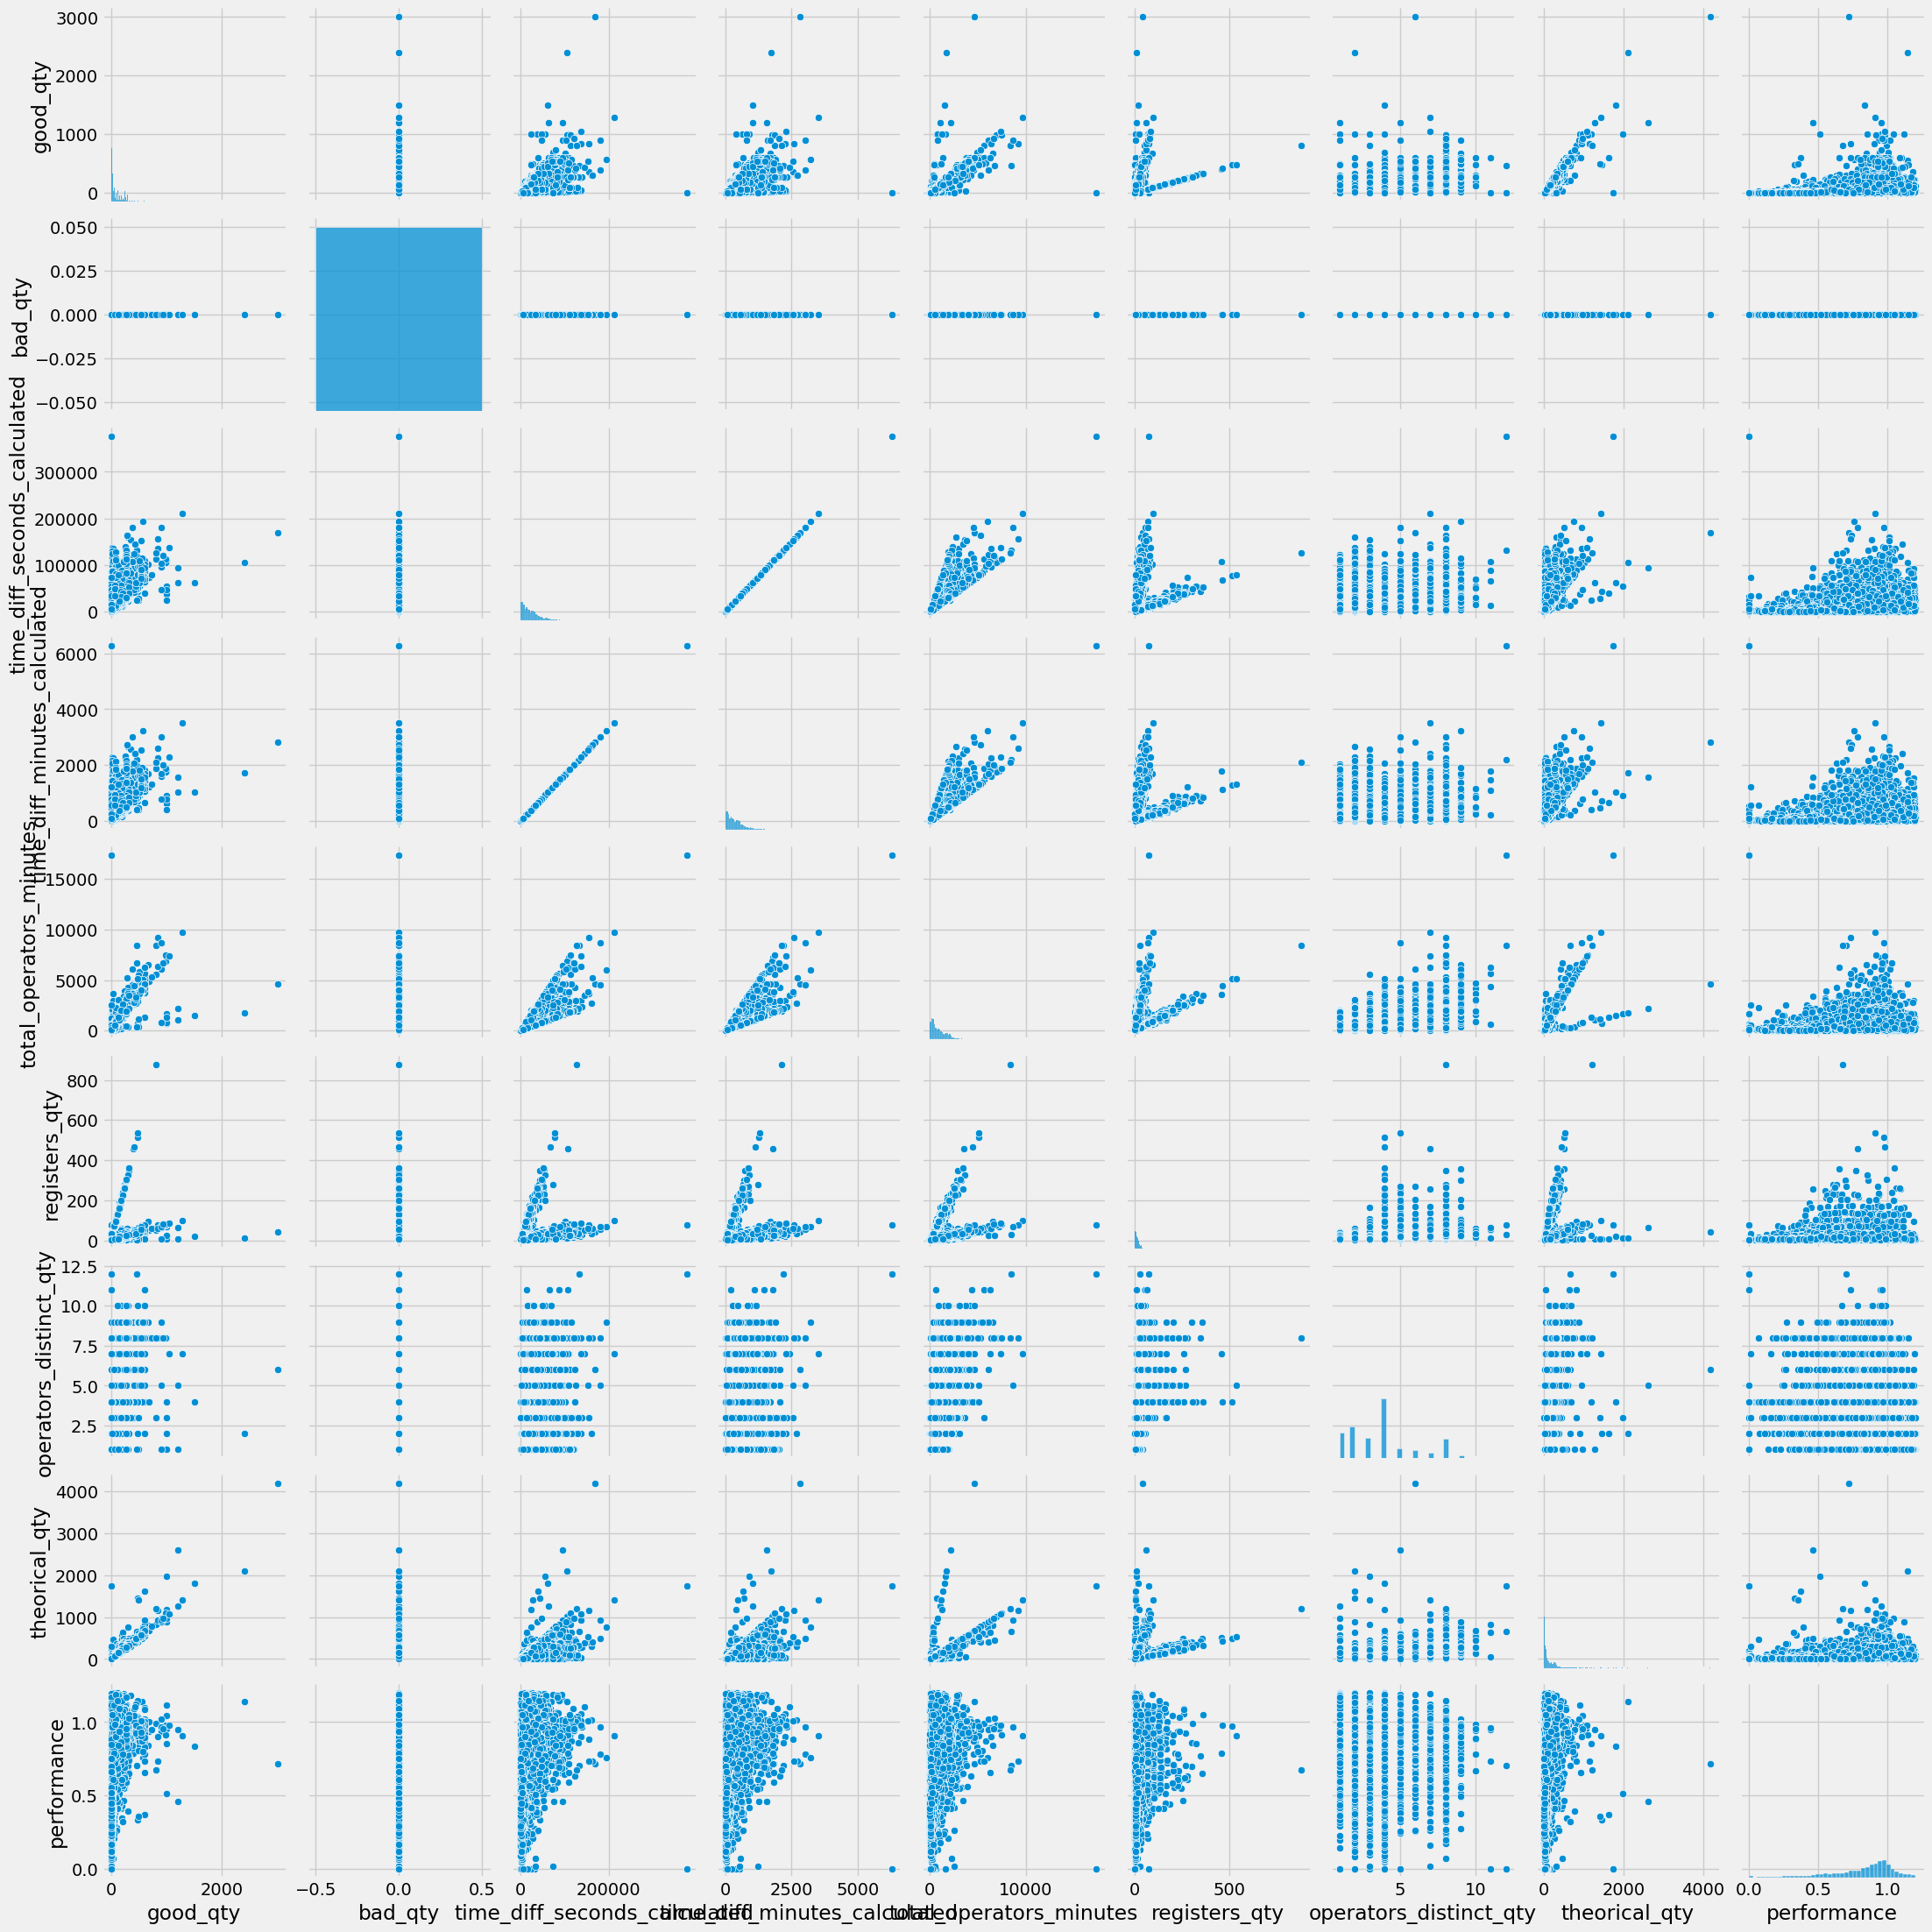

In [83]:
sns.pairplot(df_of[FEATURES])

/var/folders/th/fw9vgnb57s3c_wc29f04z42h0000gn/T/ipykernel_49560/4137042097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_of[FEATURES].corr()


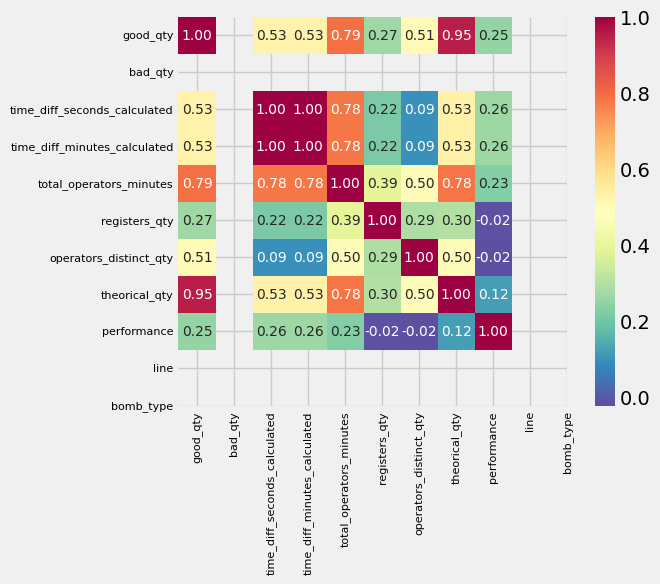

In [84]:

corrmat = df_of[FEATURES].corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df_of[FEATURES].columns,
                 xticklabels=df_of[FEATURES].columns, 
                 cmap="Spectral_r")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()